## Á¨¨10ÁµÑÔºöÊúüÊú´Â†±Âëä
### Ë≥áÊñôË™™Êòé

Êú¨Â∞àÊ°àË≥áÊñô‰æÜÊ∫êÊñº Google Play Áà¨Ëü≤ÔºåËíêÈõÜÂêà‰ΩúÈáëÂ∫´ App Êñº 2017 Ëá≥ 2024 Âπ¥ÈñìÂè∞ÁÅ£Âú∞ÂçÄÁöÑ‰ΩøÁî®ËÄÖË©ïË´ñÔºåÁ∏ΩË®à 3006 Á≠Ü„ÄÇ  
Ë≥áÊñôÊ¨Ñ‰ΩçÂåÖÂê´Ôºö

- `reviewId`ÔºöË©ïË´ñÂîØ‰∏ÄË≠òÂà•Á¢º  
- `score`ÔºöË©ïÂàÜÔºà1~5ÂàÜÔºâ  
- `content`ÔºöË©ïË´ñÂÖßÂÆπ  
- `at`ÔºöË©ïË´ñÊó•Êúü  
- `appVersion`ÔºöApp ÁâàÊú¨  
- `userName`ÔºöÁî®Êà∂ÂêçÁ®±  

Êú¨Â∞àÊ°àÂ∞áÈáùÂ∞ç‰∏äËø∞Ë≥áÊñôÈÄ≤Ë°å‰∏ªÈ°åÂàÜÊûêËàáË¶ñË¶∫ÂåñÔºåÊé¢Ë®é‰∏çÂêåÊôÇÊúü„ÄÅÁâàÊú¨‰∏ãÁöÑÁî®Êà∂ÂõûÈ•ãËàá‰∏ªÈ°åÂàÜÂ∏É„ÄÇ


## 1. ËºâÂÖ•ÂøÖË¶ÅÂ•ó‰ª∂


In [1]:
import time 
from functools import reduce
from collections import Counter
from pprint import pprint

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import jieba
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from gensim.corpora import Dictionary
from gensim.models import LdaModel, CoherenceModel
from gensim.models.ldamulticore import LdaMulticore
from gensim.matutils import corpus2csc, corpus2dense, Sparse2Corpus
from wordcloud import WordCloud
import pyLDAvis
import pyLDAvis.gensim_models

In [2]:
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [3]:
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei']  # ÂæÆËªüÊ≠£ÈªëÈ´î
plt.rcParams['axes.unicode_minus'] = False


## 2. Ë≥áÊñôÂâçËôïÁêÜ

### Ë≥áÊñôÂâçËôïÁêÜË™™Êòé

1. ÂåØÂÖ•ÂéüÂßãË≥áÊñôÔºåÂÉÖ‰øùÁïôÈúÄË¶ÅÁöÑÊ¨Ñ‰ΩçÔºàreviewId„ÄÅscore„ÄÅcontent„ÄÅat„ÄÅappVersion„ÄÅuserNameÔºâ„ÄÇ
2. ÁßªÈô§Ë©ïË´ñÂÖßÂÆπ‰∏≠ÁöÑÁ∂≤ÂùÄÔºåÂè™‰øùÁïôÁ¥îÊñáÂ≠ó„ÄÇ
3. Â∞áË©ïË´ñÊó•ÊúüËΩâÊèõÁÇ∫ datetime Ê†ºÂºèÔºåÊñπ‰æøÂæåÁ∫åÂàÜÊûê„ÄÇ
4. Â∞á appVersion Ê¨Ñ‰ΩçÁ∞°ÂåñÁÇ∫‰∏ªÁâàÊú¨ËôüÔºà‰æãÂ¶Ç 3.22.1 ‚Üí 3.22Ôºâ„ÄÇ
5. Ë®≠ÂÆöÁπÅÈ´î‰∏≠ÊñáÊñ∑Ë©ûË©ûÂ∫´Ôºå‰∏¶ËºâÂÖ•ÂÅúÁî®Ë©ûË°®„ÄÇ
6. ‰ΩøÁî® jieba ÈÄ≤Ë°å‰∏≠ÊñáÊñ∑Ë©ûÔºå‰∏¶ÁßªÈô§ÂÅúÁî®Ë©ûÂèäÂñÆÂ≠óÔºåÂÉÖ‰øùÁïôÊúâÊÑèÁæ©ÁöÑË©ûÂΩô„ÄÇ
7. Â∞áÊñ∑Ë©ûÁµêÊûúÊñ∞Â¢ûÁÇ∫ words Ê¨Ñ‰ΩçÔºå‰ΩúÁÇ∫ÂæåÁ∫å‰∏ªÈ°åÂàÜÊûêÁöÑÂü∫Á§é„ÄÇ

In [7]:
udn = pd.read_csv("merged_data.csv")  # ÂåØË≥áÊñô

udn = udn[['reviewId', 'score', 'content', 'at', 'appVersion','userName']]
udn.head(3)

reviewId  score  \
0  179e2c16-8898-4086-96ff-b897f0284ac4      1   
1  781b02f8-bc78-4240-bb9e-45b2d9ccd61f      3   
2  ed390033-a91c-4146-bde7-d4533145e9ba      1   

                                     content                   at appVersion  \
0                          Êõ¥Êñ∞ÂæåÂÆåÂÖ®ÁôªÂÖ•‰∏çÈÄ≤ÂéªÔºåË´ãÁ´ãÂç≥ÊîπÂñÑ„ÄÇ  2017-12-29 18:17:05  3.15.1219   
1                           Â∏åÊúõÂèØ‰ª•Êñ∞Â¢ûÂúñÂΩ¢ÊâãÂã¢ÊàñÊòØÊåáÁ¥ãÁôªÂÖ•  2017-12-22 16:00:34  3.15.1219   
2  Êåâ‰∫îÈ°ÜÊòüÁöÑËá™Â∑±Âì°Â∑•ÈÄÜÔºü ËºâÂÖ•ÈÉΩÁÑ°Ê≥ïÈÄ≤ÂÖ•ÁöÑapp ÊúâÊ≤íÊúâÊêûÈåØÂïä Èå¢‰∏çÊòØÈÄôÊ®£Ëä±ÁöÑÈòøÂ§ßÂì•  2017-12-21 12:25:16  3.15.1219   

     userName  
0  Google ‰ΩøÁî®ËÄÖ  
1  Google ‰ΩøÁî®ËÄÖ  
2  Google ‰ΩøÁî®ËÄÖ

In [8]:
# Âè™Áïô‰∏ã‰∏≠ÊñáÂ≠ó
udn["content"] = udn["content"].str.replace("(http|https)://.*", "", regex=True)
udn['artDate'] = pd.to_datetime(udn['at'])
udn['appVersion'] = udn['appVersion'].str.split('.').str[:2].str.join('.')

udn = udn.loc[:,['reviewId', 'score', 'content', 'artDate', 'appVersion','userName']]  # ÊñáÁ´†ÂÖßÂÆπ ÊñáÁ´†ÈÄ£Áµê
udn.head(3)

reviewId  score  \
0  179e2c16-8898-4086-96ff-b897f0284ac4      1   
1  781b02f8-bc78-4240-bb9e-45b2d9ccd61f      3   
2  ed390033-a91c-4146-bde7-d4533145e9ba      1   

                                     content             artDate appVersion  \
0                          Êõ¥Êñ∞ÂæåÂÆåÂÖ®ÁôªÂÖ•‰∏çÈÄ≤ÂéªÔºåË´ãÁ´ãÂç≥ÊîπÂñÑ„ÄÇ 2017-12-29 18:17:05       3.15   
1                           Â∏åÊúõÂèØ‰ª•Êñ∞Â¢ûÂúñÂΩ¢ÊâãÂã¢ÊàñÊòØÊåáÁ¥ãÁôªÂÖ• 2017-12-22 16:00:34       3.15   
2  Êåâ‰∫îÈ°ÜÊòüÁöÑËá™Â∑±Âì°Â∑•ÈÄÜÔºü ËºâÂÖ•ÈÉΩÁÑ°Ê≥ïÈÄ≤ÂÖ•ÁöÑapp ÊúâÊ≤íÊúâÊêûÈåØÂïä Èå¢‰∏çÊòØÈÄôÊ®£Ëä±ÁöÑÈòøÂ§ßÂì• 2017-12-21 12:25:16       3.15   

     userName  
0  Google ‰ΩøÁî®ËÄÖ  
1  Google ‰ΩøÁî®ËÄÖ  
2  Google ‰ΩøÁî®ËÄÖ

In [9]:
# Ë®≠ÂÆöÁπÅÈ´î‰∏≠ÊñáË©ûÂ∫´
jieba.set_dictionary("./dict/dict.txt.big")

# Êñ∞Â¢ûstopwords
# jieba.analyse.set_stop_words('./dict/stop_words.txt') #jieba.analyse.extract_tagsÊâçÊúÉ‰ΩúÁî®
with open("./dict/stop_words.txt", encoding="utf-8") as f:
    stopWords = [line.strip() for line in f.readlines()]

# Ë®≠ÂÆöÊñ∑Ë©û function
def getToken(row):
    seg_list = jieba.cut(row, cut_all=False)
    seg_list = [
        w for w in seg_list if w not in stopWords and len(w) > 1
    ]  # ÁØ©ÈÅ∏ÊéâÂÅúÁî®Â≠óËàáÂ≠óÂÖÉÊï∏Â§ßÊñº1ÁöÑË©ûÂΩô
    return seg_list

udn["words"] = udn["content"].apply(getToken)
udn.head()

Building prefix dict from c:\Users\hank\Desktop\sb\dict\dict.txt.big ...
2025-05-19 11:32:54,837 : DEBUG : Building prefix dict from c:\Users\hank\Desktop\sb\dict\dict.txt.big ...
Loading model from cache C:\Users\hank\AppData\Local\Temp\jieba.u465ee282b7ba9db18471e8710c3c9621.cache
2025-05-19 11:32:54,839 : DEBUG : Loading model from cache C:\Users\hank\AppData\Local\Temp\jieba.u465ee282b7ba9db18471e8710c3c9621.cache
Loading model cost 0.948 seconds.
2025-05-19 11:32:55,787 : DEBUG : Loading model cost 0.948 seconds.
Prefix dict has been built successfully.
2025-05-19 11:32:55,788 : DEBUG : Prefix dict has been built successfully.


reviewId  score  \
0  179e2c16-8898-4086-96ff-b897f0284ac4      1   
1  781b02f8-bc78-4240-bb9e-45b2d9ccd61f      3   
2  ed390033-a91c-4146-bde7-d4533145e9ba      1   
3  7eb57a03-e2dc-4bba-a0bd-9a059d6c0254      5   
4  90a8f503-05a0-4459-9b53-a9d57439cc7b      3   

                                     content             artDate appVersion  \
0                          Êõ¥Êñ∞ÂæåÂÆåÂÖ®ÁôªÂÖ•‰∏çÈÄ≤ÂéªÔºåË´ãÁ´ãÂç≥ÊîπÂñÑ„ÄÇ 2017-12-29 18:17:05       3.15   
1                           Â∏åÊúõÂèØ‰ª•Êñ∞Â¢ûÂúñÂΩ¢ÊâãÂã¢ÊàñÊòØÊåáÁ¥ãÁôªÂÖ• 2017-12-22 16:00:34       3.15   
2  Êåâ‰∫îÈ°ÜÊòüÁöÑËá™Â∑±Âì°Â∑•ÈÄÜÔºü ËºâÂÖ•ÈÉΩÁÑ°Ê≥ïÈÄ≤ÂÖ•ÁöÑapp ÊúâÊ≤íÊúâÊêûÈåØÂïä Èå¢‰∏çÊòØÈÄôÊ®£Ëä±ÁöÑÈòøÂ§ßÂì• 2017-12-21 12:25:16       3.15   
3                                     Âπ≥ÂÆâÔºåÂæàÂ•Ω„ÄÇ 2017-12-20 16:00:13       3.15   
4                                  ÁÇ∫‰ªÄÈ∫ºÊ≤íÊúâÂè∞Âπ£ÂÆöÂ≠ò 2017-12-20 08:43:32       3.15   

     userName                                    words  
0  Google ‰ΩøÁî®ËÄÖ                     [Êõ¥Êñ∞, ÂÆåÂÖ®, ÁôªÂÖ•, Á´ãÂç≥, ÊîπÂñÑ]  
1  Google ‰ΩøÁî®ËÄÖ                 [Â∏åÊúõ, Êñ∞Â¢û, ÂúñÂΩ¢, ÊâãÂã¢, ÊåáÁ¥ã, ÁôªÂÖ•]  
2  Google ‰ΩøÁî®ËÄÖ  [‰∫îÈ°ÜÊòü, Âì°Â∑•, ËºâÂÖ•, ÁÑ°Ê≥ï, ÈÄ≤ÂÖ•, app, ÊúâÊ≤íÊúâ, ÊêûÈåØ, Â§ßÂì•]  
3  Google ‰ΩøÁî®ËÄÖ                                     [Âπ≥ÂÆâ]  
4  Google ‰ΩøÁî®ËÄÖ                                 [Âè∞Âπ£, ÂÆöÂ≠ò]

## ÊñáÂ≠óÈõ≤

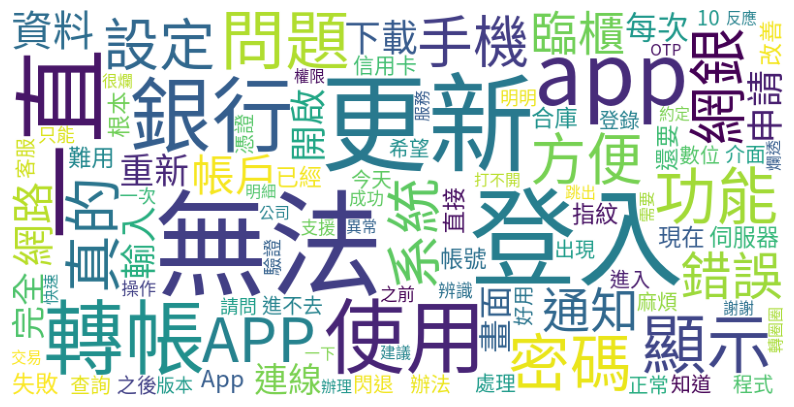

In [ ]:
from collections import Counter

FontPath = 'SourceHanSansTW-Regular.otf' # Ë®≠ÂÆöÂ≠óÂûã
wordcloud = WordCloud(background_color = 'white', width = 800, height = 400, font_path = FontPath, max_words = 100)

# ‰ª•Êñ∑Ë©ûÂæåÁöÑË©ûÂΩôÁµ±Ë®àÂá∫ÁèæÊ¨°Êï∏ÔºåË£Ω‰ΩúÊñáÂ≠óÈõ≤

# Â∞áÊâÄÊúâ words Ê¨Ñ‰ΩçÂ±ïÂπ≥Êàê‰∏ÄÂÄã list
all_words = [word for words in udn['words'] for word in words]
freq_dict = Counter(all_words)

wordcloud.generate_from_frequencies(freq_dict)

plt.figure(figsize = (10,7))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

## 3. Lexicon-based / ‰∫∫Â∑•Áµ¶ÂÆö‰∏ªÈ°åÁöÑ‰∏ªÈ°åÊ®°Âûã

#### Áî®ÂêÑÂÄãÈ†ªÂàÜÂ∏∏Ë¶ãÁöÑË©û‰æÜ‰ΩúÁÇ∫‰∏ªÈ°åÁöÑ‰ª£Ë°®Ë©û

In [ ]:
## ÂÆöÁæ©‰∏ªÈ°å Â•ΩÊ£íÊ£íÁöÑË©ïË´ñ
sport_cnt = udn.loc[udn['score'] == 5,:]['words'].explode().value_counts().head(100)
sport_cnt.index

Index(['Êñπ‰æø', 'Â•ΩÁî®', 'Êõ¥Êñ∞', 'ËΩâÂ∏≥', 'ÂäüËÉΩ', '‰∏çÈåØ', '‰ΩøÁî®', '‰ªãÈù¢', 'ÈäÄË°å', 'ÁÑ°Ê≥ï', 'Êìç‰Ωú', 'ÂØ¶Áî®',
       'ÂïèÈ°å', 'APP', 'ÁúãÁúã', 'Ë¨ùË¨ù', 'app', 'Âä†Ê≤π', 'ÊâãÊ©ü', 'ÂêàÂ∫´', 'ÊåáÁ¥ã', 'È°ØÁ§∫', 'ÊúçÂãô',
       '‰∏ÄÁõ¥', 'Â∏åÊúõ', 'Âø´ÈÄü', 'ÊîπÁâà', 'ÁúüÁöÑ', 'ÁôªÂÖ•', 'Á∂≤ÈäÄ', 'Ê≠£Â∏∏', 'Áõ¥Êé•', 'Good', 'Ë®≠ÂÆö',
       '‰æøÂà©', 'good', 'Ë¶™Âàá', 'ÂÆâÂÖ®', 'App', 'Ëæ®Ë≠ò', 'Âª∫Ë≠∞', 'ÈÇÑÂ•Ω', 'Êñ∞Â¢û', 'Êü•Ë©¢', 'ÂæàÊ£í',
       '‰ΩøÁî®ËÄÖ', 'ÈÄ≤Ê≠•', 'Á∞°ÂñÆ', 'Ë°åÂãï', 'ÁèæÂú®', 'ÈÅ∏Êìá', 'Áü•ÈÅì', 'ÁπºÁ∫å', 'ÊòéÁ¥∞', 'ÈÅ∏È†Ö', 'Á≥ªÁµ±', 'Áï´Èù¢',
       'Á∂≤Ë∑Ø', 'È∫ªÁÖ©', 'pay', 'Âè∞ÁÅ£', 'Â∑≤Á∂ì', 'Ëá™Âãï', 'Ë≥áÊñô', 'ÈåØË™§', 'Ë¶∫Âæó', 'ÂÆ¢Êúç', 'ËôïÁêÜ', 'Ëæ¶Ê≥ï',
       'ÈñãÂïü', 'ÈáëËûç', 'Â∏≥Ëôü', 'ÊîπÂñÑ', '‰πãÂæå', 'ÊØîËºÉ', 'ÂèçÊáâ', 'Android', 'ÈáçÊñ∞', '‰ªäÂ§©', 'Ëß£Ê±∫',
       'ÈúÄË¶Å', 'È†ÅÈù¢', '10', 'ÊäïË≥á', 'Ê∏ÖÊ•ö', 'ÊÑüË¨ù', 'ÊÑüË¶∫', 'ÂØÜÁ¢º', 'ok', 'Á∞°ÂñÆÊòéÁû≠', 'Âêà‰ΩúÈáëÂ∫´',
       'Ë°åÂì°', 'ÈÄ≤ÂÖ•', 'ÈÄöÁü•', 'ÁôªÈ

In [27]:
stock_cnt = udn.loc[udn['score'] == 4,:]['words'].explode().value_counts().head(200)
pprint(" ".join(stock_cnt.index))

('ÁÑ°Ê≥ï ‰ΩøÁî® ÁôªÂÖ• Êõ¥Êñ∞ app Ë®≠ÂÆö ÂäüËÉΩ Êñπ‰æø Android ÈÄöÁü• Ë´ãÂïè ÈäÄË°å Â∏åÊúõ ÂÆöÂ≠ò ÂïèÈ°å 10 ‰∏ÄÁõ¥ Âª∫Ë≠∞ È°ØÁ§∫ ‰∫§Êòì Ê≠£Â∏∏ ‰∏çÈåØ Â∑≤Á∂ì '
 '‰º∫ÊúçÂô® ÊØèÊ¨° App Â•ΩÁî® ËΩâÂ∏≥ Ë≥áÊñô ÁõÆÂâç ‰πãÂâç APP ÊîØÊè¥ ÈñãÂïü ÊåáÁ¥ã Â∏≥Êà∂ ÊÜëË≠â Êñ∞Â¢û ÂÑ™ÊÉ† ‰øÆÊîπ Áõ¥Êé• Ëæ®Ë≠ò pay ÊâãÊ©ü Ê¨äÈôê Â¢ûÂä† ÈåØË™§ '
 '‰ªäÂ§© ÈÄ≤Ê≠• ‰ªãÈù¢ Ëá™Âãï Êà™Âúñ ÂêàÂ∫´ ‰∏Ä‰∏ã Â∏∏Áî® ÈúÄË¶Å Ë¨ùË¨ù Á∑ö‰∏ä ‰∏çÂà∞ Ëß£Èéñ ÊîπÂñÑ Ëû¢Âπï ÂÆ¢Êúç Âá∫Áèæ ‰πãÂæå Êìç‰Ωú Êñ∞Áâà Âè∞Âπ£ ÂõûË¶Ü ÁµÇÊñº Â§±Êïó Ëß£Ê±∫ '
 'ÈáçÊñ∞ Âè∞ÁÅ£ ÈñÉÈÄÄ Pixel ÈªÉÈáë ‰∏ÄÈªû ÈÅÆËîΩ ÁÖ©Ë´ã ÂàÜË°å Áî®ÂøÉ ÈÄôË£° Ë≤∑Ë≥£ ÊîπÁâà android Ë®äËôü ÈÅ∏È†Ö ÂçáÁ¥ö Êî∂Ê¨æ ÊØèÊúà ÂÖ•Ê¨æ Á≥ªÁµ± Âä†Ê≤π ‰∏ãËºâ '
 'Âá∫ÂÖ• Ëá≥Â∞ë ‰πãÂÖß Âè™ËÉΩ Áï´Èù¢ Ëº∏ÂÖ• ‰∏çÁî® Ê°åÈù¢ ÈÄüÂ∫¶ Á∂úÂ≠òËΩâ ÈÉ®‰ªΩ ÁîüÁâ© Èù¢ÈÉ® ÁúüÊòØ Â∏≥Ëôü È©óË≠â ÈÉµÂ±Ä ÁøíÊÖ£ È°çÂ∫¶ XXXX ÈÄ£Áµê ‰ª£Áπ≥ Èõ∂Â≠òÊï¥‰ªò Ë£°Èù¢ '
 'Â≠òÊà∂ Ë©ïÂÉπ Áì¶ÊñØ Áü•ÈÅì ‰∏ÄÈ°Ü Áî®Êà∂ ÂéüÊú¨ ÂèçÊáâ ÂØÜÁ¢º ÂÆåÊàê Ë≤¥Ë°å ÊÑüË¨ù ÁôªÈåÑ Áî≥Ë´ã ÊâìÈñã Ê¥ªÂ≠ò ÊÑüË¶∫ ÁæéÈáë icon Âêà‰ΩúÈáëÂ∫´ 30 Ëæ¶

In [28]:
score3 = udn.loc[udn['score'] == 3,:]['words'].explode().value_counts().head(200)
pprint(" ".join(score3.index))

('ÁôªÂÖ• Êõ¥Êñ∞ ÁÑ°Ê≥ï ‰∏ÄÁõ¥ ‰ΩøÁî® app È°ØÁ§∫ ËΩâÂ∏≥ ÂäüËÉΩ ÂØÜÁ¢º ÈÄöÁü• ÈäÄË°å ÂïèÈ°å Â∏åÊúõ ÊâãÊ©ü ÂÆöÂ≠ò ‰∏ãËºâ Ë´ãÂïè App ÈåØË™§ Á∂≤ÈäÄ Âø´ÈÄü È∫ªÁÖ© ‰ªäÂ§© Â∑≤Á∂ì '
 'Á≥ªÁµ± Áï´Èù¢ ÈáçÊñ∞ ÈÄ≤ÂÖ• ÊîπÂñÑ Ë≥áÊñô Êñπ‰æø ‰πãÂâç Ë®≠ÂÆö Ê¨äÈôê Ëº∏ÂÖ• ÊòØÂê¶ Ë¨ùË¨ù ÊØèÊ¨° ÈñãÂïü APP 10 ‰º∫ÊúçÂô® ÊåáÁ¥ã Êà™Âúñ Ê≠£Â∏∏ ÂêàÂ∫´ Â§±Êïó È©óË≠â Ëß£Ê±∫ '
 'Â¢ûÂä† Ë∑≥Âá∫ ‰ø°Áî®Âç° ‰∫§Êòì Êü•Ë©¢ ÁôªÂá∫ Ëæ®Ë≠ò ÁúüÁöÑ ÊîØÊè¥ ÈñãÊîæ Âè∞Âπ£ Á∂≤Ë∑Ø Âè™ËÉΩ Âá∫Áèæ Ë°åÂãï Â∏≥Ëôü ‰∏Ä‰∏ã ‰ªòÊ¨æ ÂÖ•Â∏≥ Á∑ö‰∏ä ÁèæÂú® ËªüÈ´î ÁâàÊú¨ Á®ãÂºè Áõ°Âø´ '
 '‰∏ÄÊ¨° ÈÄ£Á∑ö ÁãÄÊ≥Å Â≠òÊ¨æ Áï∞Â∏∏ ÊòéÁ¥∞ ÂÆâË£ù ÊúçÂãô Êâì‰∏çÈñã ‰πãÂæå ËΩâÂúàÂúà ÁúãÂà∞ ÁõÆÂâç Âç≥ÊôÇ ÊòéÊòé ÁôªÈåÑ ÊáâË©≤ ‰ªãÈù¢ ‰∫∫Âì° ËôïÁêÜ ÈúÄË¶Å ÂúñÂΩ¢ Ëæ¶ÁêÜ Â∏≥ËôüÂØÜÁ¢º '
 'Êìç‰Ωú ÂèçÊáâ Áõ¥Ë™™ ÈáëÈ°ç Ëæ¶Ê≥ï ÁîüÁâ© ËÆÄÂèñ ÂÖßÂÆπ ÂÆâÂçì Ë£°Èù¢ Â∏≥Êà∂ È§òÈ°ç ÂêåÊ≠• ËΩâÂá∫ Ë≤¥Ë°å Áõ¥Êé• ÈÄ≤‰∏çÂéª ÈÅ∏È†Ö Ëß£Èéñ Áü•ÈÅì Âà∑Âç° ‰ª£Ëôü ÂæàÊÖ¢ Á∞°Ë®ä ÂÆåÂÖ® '
 'ÊúÄËøë ÁôªÂÖ•Âæå Ë¶∫Âæó Ë®äÊÅØ ÂèñÊ∂à .... ÈÇÑË¶Å ÈÄ≤Ê≠• ÊàêÂäü Êâ£Ê¨æ ÂÅµÊ∏¨ Áî®Êà∂ ËøîÂõû ÈÅé‰∫Ü Èáç

In [29]:
score2 = udn.loc[udn['score'] == 2,:]['words'].explode().value_counts().head(200)
pprint(" ".join(score2.index))

('ÁôªÂÖ• ÁÑ°Ê≥ï Êõ¥Êñ∞ ‰∏ÄÁõ¥ ËΩâÂ∏≥ app ‰ΩøÁî® ÈäÄË°å È°ØÁ§∫ Ë®≠ÂÆö ÈáçÊñ∞ ÂäüËÉΩ ÊåáÁ¥ã ÈÄöÁü• Á∂≤ÈäÄ Ëº∏ÂÖ• Á≥ªÁµ± ÈñãÂïü ÂïèÈ°å Áî≥Ë´ã ÂØÜÁ¢º Ë≥áÊñô APP ÈåØË™§ Â∏≥Êà∂ '
 'Â∏≥Ëôü Â§±Êïó ÊòéÁ¥∞ ‰∫§Êòì Á¥ÑÂÆö ÊâãÊ©ü Ëá®Ê´É Êñπ‰æø ÂÆåÂÖ® ÈÄ≤ÂÖ• ‰∏ãËºâ Âá∫Áèæ Áõ¥Êé• ÂêåÊ≠• Êà™Âúñ ÁúüÁöÑ Â∏åÊúõ ÁèæÂú® ‰ªãÈù¢ ËôïÁêÜ ‰º∫ÊúçÂô® Ëæ¶Ê≥ï ÊØèÊ¨° ‰ø°Áî®Âç° '
 '‰ΩøÁî®ËÄÖ ÈÇÑË¶Å È∫ªÁÖ© ‰ªäÂ§© ÊîπÂñÑ Á∂≤Ë∑Ø Â∑≤Á∂ì OTP ÂúñÂΩ¢ Ë´ãÂïè ÈÄ£Á∑ö Áü•ÈÅì ÈñÉÈÄÄ App Ê≠£Â∏∏ Á®ãÂºè ÈáëÈ°ç Âª∫Ë≠∞ ÊôÇÈñì ‰πãÂâç ËΩâÂá∫ ËÆÄÂèñ Ë∑≥Âá∫ ‰πãÂæå '
 'Áõ°Âø´ Ë¨ùË¨ù ÁôªÈåÑ Á∞°Ë®ä ‰∏çÂ•Ω ÊÜëË≠â ÈÄ≤‰∏çÂéª Ë°åÂãï Âè™ËÉΩ Ëæ®Ë≠ò Âø´ÈÄü Â¢ûÂä† Áï∂Ê©ü Android ÂêàÂ∫´ ÂÆöÂ≠ò Êó•Êúü Áï´Èù¢ Áï∞Â∏∏ Ë®äÊÅØ ‰∏çÂà∞ ‰∏ÄÊ¨° Ë®≠Ë®à '
 'ÈúÄË¶Å Á¨¨‰∏ÄÊ¨° Êâì‰∏çÈñã ÊàêÂäü Á™ÅÁÑ∂ Êìç‰Ωú ÈÄ£‰∏ç‰∏ä ‰øÆÊ≠£ ÂÖ•Â∏≥ 10 .... ÂÆ¢Êúç QR Ë™çË≠â Êü•Ë©¢ ‰∏çËÆì ÊúçÂãô ÈÄ£Êé• È©óË≠â Á©©ÂÆö Ê¨äÈôê ÂÖ¨Âè∏ ÁôªÂá∫ Ê†πÊú¨ '
 'ÊîØÊè¥ È¶ñÈ†Å Êù±Ë•ø ÈñãÈÄö Ê¨Ñ‰Ωç Ë¶∫Âæó ÁâàÊú¨ Ê∂àË≤ª ÂπæÂ§© Êâ£Ê¨æ Âø´Èªû ‰∫∫Âì° ‰∏çÁî® ‰∏çÈåØ ËΩâËΩâ ÊâìÈñã ÂåØÊ¨æ Â§™‰πÖ Áπ≥Ë≤ª Êî∂‰∏

In [24]:
score1 = udn.loc[udn['score'] == 1,:]['words'].explode().value_counts().head(200)
pprint(" ".join(score1.index))

('ÁÑ°Ê≥ï Êõ¥Êñ∞ ÁôªÂÖ• ‰∏ÄÁõ¥ app ÈäÄË°å ËΩâÂ∏≥ ‰ΩøÁî® ÂïèÈ°å ÂØÜÁ¢º APP È°ØÁ§∫ ÁúüÁöÑ Á∂≤ÈäÄ Ëá®Ê´É Á≥ªÁµ± ÈåØË™§ ÂäüËÉΩ ÊâãÊ©ü Â∏≥Êà∂ Èõ£Áî® Á∂≤Ë∑Ø Áî≥Ë´ã ‰∏ãËºâ ÂÆåÂÖ® '
 'ÈÄ£Á∑ö Ë≥áÊñô ÈÇÑË¶Å Áï´Èù¢ ÊØèÊ¨° Ëº∏ÂÖ• Ë®≠ÂÆö Ê†πÊú¨ ÈñãÂïü ‰º∫ÊúçÂô® ÁèæÂú® Â§±Êïó ÂêàÂ∫´ Â∏≥Ëôü ÈÄöÁü• ÈáçÊñ∞ Â∑≤Á∂ì App ÂÆ¢Êúç Áõ¥Êé• ‰ø°Áî®Âç° ÊîπÂñÑ Êï∏‰Ωç Êü•Ë©¢ '
 'ÈÄ≤‰∏çÂéª ‰πãÂæå Á®ãÂºè ÈñÉÈÄÄ Áü•ÈÅì Ëæ¶Ê≥ï ËôïÁêÜ ÁôªÈåÑ ÊåáÁ¥ã È∫ªÁÖ© Âá∫Áèæ ‰∏ÄÊ¨° ÊòéÊòé ÂæàÁàõ ÊÜëË≠â Êñπ‰æø Âè™ËÉΩ ‰ªãÈù¢ ÁâàÊú¨ ÁàõÈÄè È©óË≠â ÊàêÂäü Êâì‰∏çÈñã ËΩâÂúàÂúà '
 'ÁàõÊ≠ª Á∂≤È†Å 10 Ëæ¶ÁêÜ ‰ªäÂ§© ÈÄ≤ÂÖ• ÂÖ¨Âè∏ ‰∏çË°å Áï∞Â∏∏ Êù±Ë•ø ÊîØÊè¥ ‰∏çÊÉ≥ ‰∏Ä‰∏ã ÂèçÊáâ Á¥ÑÂÆö OTP ÈñãÊà∂ ‰∏ÄÂ†Ü Ê≠£Â∏∏ ‰πãÂâç ÂππÂòõ ÈúÄË¶Å ÊôÇÈñì ‰∏ÄÈªû ‰∏çÂ•Ω '
 'Ë∑≥Âá∫ Ëæ®Ë≠ò Ë∂ÖÁ¥ö Ê¨äÈôê Êìç‰Ωú Âêà‰ΩúÈáëÂ∫´ ‰∫∫Âì° ÂêåÊ≠• Ë®äÊÅØ ÂÆâË£ù Á¨¨‰∏ÄÊ¨° Ë´ãÂïè Â∏åÊúõ ‰∏çÂà∞ Á∑ö‰∏ä ÁàõÂà∞ Á™ÅÁÑ∂ Á∂ÅÂÆö Ëß£Èéñ ÂÖ•Â∏≥ Ë®≠Ë®à ÁúüÊòØ Áõ¥Ë™™ ÂπæÊ¨° '
 '‰∏çÁî® ÊòéÁ¥∞ ÊúÄÁàõ ‰∏ÄÈ°Ü ÂÆ¢Êà∂ È§òÈ°ç Ë≥áË®ä ‰ΩøÁî®ËÄÖ Ê≠£Á¢∫ Ë£ùÁΩÆ Âà•ÂÆ∂ ÈáëÈ°ç Ë°åÂãï ÊúçÂãô Ê†πÊú¨ÁÑ°Ê≥ï ‰∫

Âæû custom_topic_word ÁöÑÊâÄÊúâÂÄº‰∏≠ÔºåÊï¥ÁêÜÂá∫‰∏çÈáçË§áÁöÑË©ûÂΩôÔºàvocabulariesÔºâÔºå‰∏¶‰ª• NumPy Èô£ÂàóÁöÑÂΩ¢ÂºèÂÑ≤Â≠ò„ÄÇ

Âà©Áî® CountVectorizer ÁöÑ vocabulary ÂèÉÊï∏‰æÜÁØ©ÈÅ∏„ÄÅË£Ω‰Ωú DTM

## 4. LDA ‰∏ªÈ°åÊ®°Âûã
Latent Dirichlet allocation Á∞°Á®± LDAÔºåÊòØ‰∏ÄÁ®Æ‰∏ªÈ°åÊ®°ÂûãÔºå‰ªñÂèØ‰ª•Â∞áË≥áÊñôÈõÜ‰∏≠ÊØèÁØáÊñáÊ™îÁöÑ‰∏ªÈ°åÊåâÁÖßÊ©üÁéáÂàÜ‰ΩàÔºå‰ªñÊòØÁÑ°Áõ£Áù£Â≠∏ÁøíÊ≥ïÔºåË®ìÁ∑¥ÊôÇ‰∏çÈúÄË¶ÅÊâãÂãïÊ®ôË®ªÔºåÂè™ÈúÄË¶ÅÁµ¶ÊñáÊ™îÈõÜ„ÄÅ‰∏ªÈ°åÊï∏Ôºå‰πüÂèØ‰ª•Ê†πÊìö‰∏Ä‰∫õÂèÉÊï∏(alpha„ÄÅBeta)‰æÜÊîπËÆäÊ®°ÂûãË®ìÁ∑¥ÁöÑÁµêÊûúÔºå‰ª•‰∏ã‰ΩøÁî® gensim Â•ó‰ª∂‰æÜÁ§∫ÁØÑÂ¶Ç‰ΩïË®ìÁ∑¥ LDA Ê®°Âûã„ÄÇ

### **4.1 Ê≠£ÂºèËôïÁêÜË©ïË´ñ**

Â∞áÊñ∑Ë©ûÂæåÁöÑ`doc['words']`ËΩâÊèõÊàêlist

In [35]:
docs = udn['words'].to_list()
docs[0]

['Êõ¥Êñ∞', 'ÂÆåÂÖ®', 'ÁôªÂÖ•', 'Á´ãÂç≥', 'ÊîπÂñÑ']

Âª∫Á´ã‰∏¶ÈÅéÊøæË©ûÂΩôË°®ÔºàdictionaryÔºâÔºåÂè™‰øùÁïôÁâπÂÆöÊ¢ù‰ª∂ÁöÑË©ûÂΩô

In [38]:
dictionary = Dictionary(docs)

dictionary.filter_extremes(no_below=5, no_above=0.99)
corpus = [dictionary.doc2bow(doc) for doc in docs]
print(dictionary)

2025-05-18 17:47:04,792 : INFO : adding document #0 to Dictionary<0 unique tokens: []>
2025-05-18 17:47:04,820 : INFO : built Dictionary<4220 unique tokens: ['ÂÆåÂÖ®', 'ÊîπÂñÑ', 'Êõ¥Êñ∞', 'ÁôªÂÖ•', 'Á´ãÂç≥']...> from 3006 documents (total 26424 corpus positions)
2025-05-18 17:47:04,821 : INFO : Dictionary lifecycle event {'msg': "built Dictionary<4220 unique tokens: ['ÂÆåÂÖ®', 'ÊîπÂñÑ', 'Êõ¥Êñ∞', 'ÁôªÂÖ•', 'Á´ãÂç≥']...> from 3006 documents (total 26424 corpus positions)", 'datetime': '2025-05-18T17:47:04.821149', 'gensim': '4.3.3', 'python': '3.10.11 (tags/v3.10.11:7d4cc5a, Apr  5 2023, 00:38:17) [MSC v.1929 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.26100-SP0', 'event': 'created'}
2025-05-18 17:47:04,826 : INFO : discarding 3465 tokens: [('Á´ãÂç≥', 4), ('ÊâãÂã¢', 3), ('Âì°Â∑•', 3), ('Â§ßÂì•', 1), ('ÊêûÈåØ', 4), ('Âπ≥ÂÆâ', 2), ('‰∏ÄÈÄö', 1), ('‰∫ÇÊîπ', 1), ('Êõ¥Êú¨', 2), ('Ê≤íÊ∏¨', 1)]...
2025-05-18 17:47:04,826 : INFO : keeping 755 tokens which were in no less than 5 and no more t

Dictionary<755 unique tokens: ['ÂÆåÂÖ®', 'ÊîπÂñÑ', 'Êõ¥Êñ∞', 'ÁôªÂÖ•', 'ÂúñÂΩ¢']...>


ÂèÉÊï∏Ë™™ÊòéÔºö
- no_below=5	Âá∫ÁèæÂú®Â∞ëÊñº 5 ÁØáÊñáÁ´†‰∏≠ÁöÑË©ûÊúÉË¢´ÁßªÈô§
- no_above=0.99	Âá∫ÁèæÂú®Ë∂ÖÈÅé 99% Êñá‰ª∂‰∏≠ÁöÑË©ûÊúÉË¢´ÁßªÈô§

### **4.2 ÈñãÂßãË®ìÁ∑¥ LDA topic model**

+ ÂèÉÊï∏Ë™™ÊòéÔºö
    + corpus = ÊñáÊ™îË™ûÊñôÂ∫´
    + id2word = Ë©ûÂΩôÂ≠óÂÖ∏
    + num_topics = ÁîüÊàêÂπæÂÄã‰∏ªÈ°åÊï∏
    + random_state = Âõ∫ÂÆö‰∫ÇÊï∏ÂÄºÔºåÊØèÊ¨°ÁöÑÊ®°ÂûãÁµêÊûúÊúÉ‰∏ÄÊ®£
    + iteration = ÊØèÂÄãÊñáÁ´†Ë®ìÁ∑¥ÁöÑÊ¨°Êï∏ÔºåÂèØ‰ª•Ë®≠ÂÆöÈ´ò‰∏ÄÈªûËÆìÊ®°ÂûãÊî∂ÊñÇ
    + passes(epoch) = Êï¥ÂÄã corpus Ë®ìÁ∑¥Ê®°ÂûãÁöÑÊ¨°Êï∏
    + alpha = ÊñáÁ´†‰∏ªÈ°åÂàÜ‰Ωà
    + eta = ‰∏ªÈ°åÂ≠óÂàÜ‰Ωà

Ê®°ÂûãÂèÉÊï∏Ê≤íÊúâ‰∏ÄÂÄãÁµïÂ∞çÁöÑÁ≠îÊ°àÔºåÂêåÂ≠∏ÂÄëÊáâË©≤**‰ΩøÁî®Áõ∏ÂêåÁöÑË≥áÊñô**ÔºåÂòóË©¶ÂÅöÂèÉÊï∏‰∏äÁöÑË™øÊï¥ÔºåÈÄ≤ËÄåÊØîËºÉÂá∫ËºÉ‰Ω≥ÁöÑÊ®°ÂûãÁµêÊûú„ÄÇ

In [39]:
ldamodel = LdaModel(
    corpus=corpus, 
    id2word=dictionary, # Â≠óÂÖ∏
    num_topics=10, # ÁîüÊàêÂπæÂÄã‰∏ªÈ°åÊï∏
    random_state=2024, # ‰∫ÇÊï∏
)

2025-05-18 17:47:08,191 : INFO : using symmetric alpha at 0.1
2025-05-18 17:47:08,192 : INFO : using symmetric eta at 0.1
2025-05-18 17:47:08,193 : INFO : using serial LDA version on this node
2025-05-18 17:47:08,194 : INFO : running online (single-pass) LDA training, 10 topics, 1 passes over the supplied corpus of 3006 documents, updating model once every 2000 documents, evaluating perplexity every 3006 documents, iterating 50x with a convergence threshold of 0.001000
2025-05-18 17:47:08,196 : WARNING : too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
2025-05-18 17:47:08,197 : INFO : PROGRESS: pass 0, at document #2000/3006
2025-05-18 17:47:08,591 : INFO : merging changes from 2000 documents into a model of 3006 documents
2025-05-18 17:47:08,593 : INFO : topic #7 (0.100): 0.050*"Êõ¥Êñ∞" + 0.045*"‰ΩøÁî®" + 0.022*"APP" + 0.019*"‰∏ÄÁõ¥" + 0.014*"È°ØÁ§∫" + 0.013*"Á∂≤ÈäÄ" + 0.013*"Â•ΩÁî®" + 0.011*"ÈÄ≤‰∏çÂéª" + 0.011*"Á

### **4.3 Êü•Áúã LDA ‰∏ªÈ°å‰ª£Ë°®Â≠ó** <br>

Áï∂ LDA Ê®°ÂûãË®ìÁ∑¥Â•Ω‰πãÂæåÔºåÊàëÂÄëÂèØ‰ª•Êü•ÁúãÊØèÂÄã‰∏ªÈ°åÁöÑÂñÆË©ûÂàÜ‰Ωà„ÄÇ<br>
num_words = ÈÅ∏ÊìáË¶ÅÊü•ÁúãÊØèÂÄã‰∏ªÈ°åÂâçÂπæÂÄãÂ≠ó„ÄÇ<br>


In [40]:
ldamodel.print_topics()

2025-05-18 17:47:11,834 : INFO : topic #0 (0.100): 0.051*"Êñπ‰æø" + 0.032*"ÈäÄË°å" + 0.027*"ÁúüÁöÑ" + 0.023*"Á®ãÂºè" + 0.021*"ÂÆ¢Êúç" + 0.020*"Áî≥Ë´ã" + 0.020*"Ë∂ÖÁ¥ö" + 0.018*"Ë≥áÊñô" + 0.017*"ÂïèÈ°å" + 0.016*"ÊâãÊ©ü"
2025-05-18 17:47:11,835 : INFO : topic #1 (0.100): 0.030*"ÈÄöÁü•" + 0.027*"ÂäüËÉΩ" + 0.025*"ÈäÄË°å" + 0.021*"Â∏≥Êà∂" + 0.019*"ËΩâÂ∏≥" + 0.017*"Áü•ÈÅì" + 0.016*"Ëæ¶ÁêÜ" + 0.015*"APP" + 0.014*"ÈáëÈ°ç" + 0.013*"ÂïèÈ°å"
2025-05-18 17:47:11,836 : INFO : topic #2 (0.100): 0.046*"ÁôªÂÖ•" + 0.040*"ÁÑ°Ê≥ï" + 0.039*"app" + 0.021*"ËΩâÂ∏≥" + 0.020*"ÈäÄË°å" + 0.019*"Êà™Âúñ" + 0.016*"Áî≥Ë´ã" + 0.015*"Ëá®Ê´É" + 0.013*"ÂØÜÁ¢º" + 0.012*"‰∏ÄÁõ¥"
2025-05-18 17:47:11,837 : INFO : topic #3 (0.100): 0.060*"Êõ¥Êñ∞" + 0.043*"‰∏ÄÁõ¥" + 0.034*"ËΩâÂ∏≥" + 0.022*"ÈÄ£Á∑ö" + 0.016*"Êñπ‰æø" + 0.016*"‰º∫ÊúçÂô®" + 0.015*"‰∏çÂà∞" + 0.015*"app" + 0.012*"Á∂≤ÈäÄ" + 0.012*"ÁÑ°Ê≥ï"
2025-05-18 17:47:11,837 : INFO : topic #4 (0.100): 0.045*"ÈäÄË°å" + 0.035*"ËΩâÂ∏≥" + 0.023*"ÈÄöÁü•" + 0.022*"Â∏≥Êà∂" + 0.018*"Êï∏‰

[(0,
  '0.051*"Êñπ‰æø" + 0.032*"ÈäÄË°å" + 0.027*"ÁúüÁöÑ" + 0.023*"Á®ãÂºè" + 0.021*"ÂÆ¢Êúç" + 0.020*"Áî≥Ë´ã" + 0.020*"Ë∂ÖÁ¥ö" + 0.018*"Ë≥áÊñô" + 0.017*"ÂïèÈ°å" + 0.016*"ÊâãÊ©ü"'),
 (1,
  '0.030*"ÈÄöÁü•" + 0.027*"ÂäüËÉΩ" + 0.025*"ÈäÄË°å" + 0.021*"Â∏≥Êà∂" + 0.019*"ËΩâÂ∏≥" + 0.017*"Áü•ÈÅì" + 0.016*"Ëæ¶ÁêÜ" + 0.015*"APP" + 0.014*"ÈáëÈ°ç" + 0.013*"ÂïèÈ°å"'),
 (2,
  '0.046*"ÁôªÂÖ•" + 0.040*"ÁÑ°Ê≥ï" + 0.039*"app" + 0.021*"ËΩâÂ∏≥" + 0.020*"ÈäÄË°å" + 0.019*"Êà™Âúñ" + 0.016*"Áî≥Ë´ã" + 0.015*"Ëá®Ê´É" + 0.013*"ÂØÜÁ¢º" + 0.012*"‰∏ÄÁõ¥"'),
 (3,
  '0.060*"Êõ¥Êñ∞" + 0.043*"‰∏ÄÁõ¥" + 0.034*"ËΩâÂ∏≥" + 0.022*"ÈÄ£Á∑ö" + 0.016*"Êñπ‰æø" + 0.016*"‰º∫ÊúçÂô®" + 0.015*"‰∏çÂà∞" + 0.015*"app" + 0.012*"Á∂≤ÈäÄ" + 0.012*"ÁÑ°Ê≥ï"'),
 (4,
  '0.045*"ÈäÄË°å" + 0.035*"ËΩâÂ∏≥" + 0.023*"ÈÄöÁü•" + 0.022*"Â∏≥Êà∂" + 0.018*"Êï∏‰Ωç" + 0.018*"ÂäüËÉΩ" + 0.017*"ÁôªÂÖ•" + 0.015*"Ë®≠ÂÆö" + 0.014*"ÈÇÑË¶Å" + 0.014*"ÂÖ•Â∏≥"'),
 (5,
  '0.029*"‰ΩøÁî®" + 0.028*"ÁôªÂÖ•" + 0.025*"‰∏ÄÁõ¥" + 0.025*"‰∏ãËºâ" + 0.024*"ÁÑ°Ê≥ï" + 0.024*"Êõ¥Êñ∞" + 0

## 5. Ë¶ñË¶∫ÂåñÂëàÁèæ



Âú®Êú¨Â∞àÊ°à‰∏≠ÔºåÊàëÂÄëÂà©Áî® LDAvis Â∞çÂêà‰ΩúÈáëÂ∫´ App ‰ΩøÁî®ËÄÖË©ïË´ñÈÄ≤Ë°å‰∏ªÈ°åÊ®°ÂûãË¶ñË¶∫Âåñ„ÄÇÈÄèÈÅé‰∫íÂãïÂºèÂúñË°®ÔºåÂèØ‰ª•Ôºö

- Áõ¥ËßÄËßÄÂØü‰∏çÂêå‰∏ªÈ°åÔºàÂ¶ÇÁôªÂÖ•ÂïèÈ°å„ÄÅÂØÜÁ¢ºÈáçË®≠„ÄÅÈáëËûçÊ•≠ÂãôÁ≠âÔºâÂú®Ë©ïË´ñ‰∏≠ÁöÑÂàÜÂ∏ÉÊÉÖÂΩ¢
- ÂàÜÊûêÂêÑ‰∏ªÈ°åÈñìÁöÑÁõ∏‰ººÊÄßËàáÂ∑ÆÁï∞ÊÄßÔºåÂçîÂä©Ëæ®Ë≠òÁî®Êà∂‰∏ªË¶ÅÈóúÊ≥®ÁöÑË≠∞È°å
- ÈÄ≤‰∏ÄÊ≠•Êé¢Á¥¢ÊØèÂÄã‰∏ªÈ°åÁöÑ‰ª£Ë°®ÊÄßÈóúÈçµË©ûÔºå‰∫ÜËß£Áî®Êà∂Âú®‰∏çÂêå‰∏ªÈ°å‰∏ãÁöÑÂÖ∑È´îÂèçÈ•ãÂÖßÂÆπ

ÈÄôÊúâÂä©ÊñºÁî¢ÂìÅÂúòÈöäÈáùÂ∞çÁî®Êà∂ÁóõÈªûÈÄ≤Ë°åÂÑ™ÂåñÔºå‰∏¶ËøΩËπ§‰∏çÂêåÁâàÊú¨ÊàñÊôÇÊúü‰∏ã‰∏ªÈ°åÂàÜÂ∏ÉÁöÑËÆäÂåñ„ÄÇ



In [ ]:
best_model = LdaModel(
    corpus = corpus,
    num_topics = 6,
    id2word=dictionary,
    random_state = 6969,
    passes = 10 # Ë®ìÁ∑¥Ê¨°Êï∏
    )

2025-05-18 17:59:15,632 : INFO : using symmetric alpha at 0.16666666666666666
2025-05-18 17:59:15,633 : INFO : using symmetric eta at 0.16666666666666666
2025-05-18 17:59:15,633 : INFO : using serial LDA version on this node
2025-05-18 17:59:15,636 : INFO : running online (multi-pass) LDA training, 6 topics, 10 passes over the supplied corpus of 3006 documents, updating model once every 2000 documents, evaluating perplexity every 3006 documents, iterating 50x with a convergence threshold of 0.001000
2025-05-18 17:59:15,636 : INFO : PROGRESS: pass 0, at document #2000/3006
2025-05-18 17:59:16,080 : INFO : merging changes from 2000 documents into a model of 3006 documents
2025-05-18 17:59:16,081 : INFO : topic #4 (0.167): 0.036*"Êñπ‰æø" + 0.029*"‰∏ÄÁõ¥" + 0.024*"ÈäÄË°å" + 0.021*"ÁÑ°Ê≥ï" + 0.017*"ÈÄ£Á∑ö" + 0.017*"ÂïèÈ°å" + 0.014*"app" + 0.014*"Á∂≤Ë∑Ø" + 0.013*"Á∂≤ÈäÄ" + 0.012*"Êõ¥Êñ∞"
2025-05-18 17:59:16,082 : INFO : topic #3 (0.167): 0.045*"Êõ¥Êñ∞" + 0.027*"‰∏ÄÁõ¥" + 0.025*"ÁôªÂÖ•" + 0.0

In [77]:
pyLDAvis.enable_notebook()
p = pyLDAvis.gensim_models.prepare(best_model, corpus, dictionary)
p

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5      0.240447 -0.068835       1        1  28.155012
2      0.108587 -0.110903       2        1  18.592177
0     -0.144094 -0.145890       3        1  17.044376
4     -0.219774 -0.021728       4        1  13.813329
1     -0.084389  0.172476       5        1  11.518941
3      0.099222  0.174881       6        1  10.876165, topic_info=    Term        Freq       Total Category  logprob  loglift
2     Êõ¥Êñ∞  590.000000  590.000000  Default  30.0000  30.0000
11    ÁÑ°Ê≥ï  625.000000  625.000000  Default  29.0000  29.0000
187   ÈÄöÁü•  167.000000  167.000000  Default  28.0000  28.0000
3     ÁôªÂÖ•  556.000000  556.000000  Default  27.0000  27.0000
59    Êñπ‰æø  129.000000  129.000000  Default  26.0000  26.0000
..   ...         ...         ...      ...      ...      ...
157   Êù±Ë•ø   17.944498   47.773611   Topic6  -4.8578   1.2394
141   Êìç‰Ωú   18.701195   58.587121   Topic6  -4.8165   1.0767
23    ÂïèÈ°å   22.017706  190.775478   Topic6  -4.6532   0.0593
15    ÂÆöÂ≠ò   16.650123   45.928706   Topic6  -4.9327   1.2039
143   ÊØèÊ¨°   17.829124  130.345311   Topic6  -4.8643   0.2292

[404 rows x 6 columns], token_table=      Topic      Freq Term
term                      
471       6  0.967155   30
752       1  0.961556  30%
609       1  0.931023   5%
91        1  0.103911  APP
91        2  0.202354  APP
...     ...       ...  ...
171       3  0.166703   È´îÈ©ó
171       5  0.700152   È´îÈ©ó
348       4  0.906629   ÈªÉÈáë
642       1  0.931036   ÈªëÂ±è
672       1  0.949279   ÈªûÈñã

[687 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 3, 1, 5, 2, 4])

### ‰∏ªÈ°åË™™Êòé

- **‰∏ªÈ°å‰∏ÄÔºöÁÑ°Ê≥ïÁôªÂÖ•**ÔºàË≤†Èù¢Ôºâ
    - Áõ∏ÈóúÊñºÁôªÂÖ•Â§±Êïó„ÄÅÈ©óË≠âÂïèÈ°åÁ≠âË≤†Èù¢ÂõûÈ•ã„ÄÇ
- **‰∏ªÈ°å‰∫åÔºöÂøòË®òÂØÜÁ¢ºÔºèÈõ£‰ª•ÊâæÂõû**ÔºàË≤†Èù¢Ôºâ
    - ‰∏ªË¶ÅÂèçÊò†ÂØÜÁ¢ºÈÅ∫Â§±„ÄÅÊâæÂõûÂõ∞Èõ£Á≠âÂïèÈ°å„ÄÇ
- **‰∏ªÈ°å‰∏âÔºöËΩâÂ∏≥ÈáëËûç**Ôºà‰∏≠ÊÄßÔºâ
    - Ë®éË´ñËΩâÂ∏≥„ÄÅ‰∫§Êòì„ÄÅÈáëËûçÂäüËÉΩÁ≠âÁõ∏ÈóúÂÖßÂÆπÔºåË©ïÂÉπËºÉÁÇ∫‰∏≠ÊÄß„ÄÇ
- **‰∏ªÈ°åÂõõÔºö‰ΩøÁî®Êñπ‰æø**ÔºàÂîØ‰∏ÄÂ•ΩË©ïÔºâ
    - Âº∑Ë™øÊìç‰Ωú‰æøÂà©„ÄÅ‰ªãÈù¢ÂèãÂñÑÁ≠âÊ≠£Èù¢Ë©ïÂÉπ„ÄÇ
- **‰∏ªÈ°å‰∫îÔºö‰ΩøÁî®È´îÈ©ó**Ôºà‰∏≠ÊÄßÔºâ
    - ÈóúÊñºÊï¥È´î‰ΩøÁî®ÊÑüÂèóÔºåÂåÖÂê´Ê≠£Èù¢ËàáË≤†Èù¢ÊÑèË¶ãÔºåÊï¥È´îÂÅè‰∏≠ÊÄß„ÄÇ
- **‰∏ªÈ°åÂÖ≠ÔºöË≤†Èù¢‰ΩøÁî®È´îÈ©ó**
    - ÈáùÂ∞çÊìç‰Ωú‰∏ç‰æø„ÄÅÁ≥ªÁµ±ÈåØË™§Á≠âË≤†Èù¢Á∂ìÈ©óÁöÑÂõûÈ•ã„ÄÇ

lambda ÁöÑÊÑèÁæ©: <https://nlp.stanford.edu/events/illvi2014/papers/sievert-illvi2014.pdf>

In [78]:
pyLDAvis.save_html(p, "lda_zh.html")

## 6. GuidedLDA ‰∏ªÈ°åÊ®°Âûã

GuidedLDAÔºàÂºïÂ∞éÂºè LDAÔºâÊòØ‰∏ÄÁ®ÆÂçäÁõ£Áù£‰∏ªÈ°åÊ®°ÂûãÊñπÊ≥ïÔºåÂÖÅË®±ÊàëÂÄëÈÄèÈÅé‰∫∫Â∑•ÊåáÂÆöÁöÑ„ÄåÁ®ÆÂ≠êË©û„Äç‰æÜÂºïÂ∞é‰∏ªÈ°åÁöÑÁîüÊàê„ÄÇÈÄôÁ®ÆÊñπÊ≥ïÁµêÂêà‰∫ÜÁÑ°Áõ£Áù£Â≠∏ÁøíÁöÑÂΩàÊÄßËàáÂ∞àÂÆ∂Áü•Ë≠òÁöÑÂ∞éÂÖ•ÔºåËÉΩËÆìÊ®°ÂûãÊõ¥ËÅöÁÑ¶ÊñºÊàëÂÄëÈóúÂøÉÁöÑ‰∏ªÈ°åÈ†òÂüü„ÄÇ

Âú®Êú¨Â∞àÊ°à‰∏≠ÔºåÊàëÂÄëÊ†πÊìöÂêà‰ΩúÈáëÂ∫´ App ‰ΩøÁî®ËÄÖË©ïË´ñÁöÑÂ∏∏Ë¶ãË≠∞È°åÔºàÂ¶ÇÁôªÂÖ•Âõ∞Èõ£„ÄÅÁ≥ªÁµ±ÈåØË™§„ÄÅÊìç‰ΩúÈ´îÈ©ó„ÄÅËΩâÂ∏≥ÂäüËÉΩ„ÄÅÂÆ¢ÊúçÂõûÊáâÁ≠âÔºâÔºåË®≠Ë®à‰∫ÜÂ§öÁµÑ‰∏ªÈ°åÁ®ÆÂ≠êË©ûÔºå‰∏¶Âà©Áî® GuidedLDA ÈÄ≤Ë°å‰∏ªÈ°åÂª∫Ê®°„ÄÇÈÄôÊúâÂä©ÊñºÔºö

- Âº∑ÂåñÊ®°ÂûãÂ∞çÁâπÂÆö‰∏ªÈ°åÁöÑËæ®Ë≠òËÉΩÂäõ
- ËÆì‰∏ªÈ°åÁµêÊûúÊõ¥Ë≤ºËøëÂØ¶ÈöõÊáâÁî®ÈúÄÊ±Ç
- ËºîÂä©ÂæåÁ∫å‰∏ªÈ°åÂàÜÂ∏É„ÄÅË∂®Âã¢ÂàÜÊûêËàáË¶ñË¶∫Âåñ

‰ª•‰∏ãÂ∞áÂ±ïÁ§∫ GuidedLDA ÁöÑÂª∫Ê®°ÊµÅÁ®ãËàá‰∏ªÈ°åË©ûÂΩôÁµêÊûú„ÄÇ

In [79]:
import guidedlda

In [80]:
word2id = dictionary.token2id

In [102]:
seed_topic_list = [
    # ÁôªÂÖ•Âõ∞Èõ£ËàáÈ©óË≠âÂïèÈ°å
    ["ÁôªÂÖ•", "ÂØÜÁ¢º", "È©óË≠â", "OTP", "ÊåáÁ¥ã", "ÁôªÈåÑ", "Â∏≥Ëôü", "Ëß£Èéñ", "ÊÜëË≠â"],

    # Á≥ªÁµ±ÈåØË™§ËàáÈñÉÈÄÄÂ¥©ÊΩ∞
    ["ÈåØË™§", "Â§±Êïó", "ÈñÉÈÄÄ", "Áï∂Ê©ü", "ÁÑ°Ê≥ï", "ËºâÂÖ•", "Ë∑≥Âá∫", "‰º∫ÊúçÂô®", "Á≥ªÁµ±"],

    # ‰ΩøÁî®È´îÈ©óÂ∑ÆËàáÊìç‰Ωú‰∏ç‰æø
    ["Èõ£Áî®", "‰ªãÈù¢", "Ë§áÈõú", "Ëº∏ÂÖ•", "Ë®≠Ë®à", "‰∏çË°å", "‰∏çÂ•Ω", "Áõ¥Ë¶∫"],

    # ËΩâÂ∏≥ËàáÂäüËÉΩÂïèÈ°å
    ["ËΩâÂ∏≥", "Êü•Ë©¢", "‰∫§Êòì", "ÂäüËÉΩ", "‰∏çÂà∞", "Â§±Êïó",  "Êìç‰Ωú"],

    # ÂÆ¢Êà∂ÊúçÂãôËàáÂïèÈ°åÂõûÊáâ
    ["ÂÆ¢Êúç", "ËôïÁêÜ", "Á≠âÂæÖ", "ÂõûË¶Ü", "ËÅØÁµ°", "ÂïèÈ°å", "ÈõªË©±"]
]

In [103]:
seed_topics = {}
for t_id, st in enumerate(seed_topic_list):
    for word in st:
        seed_topics[word2id[word]] = t_id

In [104]:
# guidedlda ÈúÄË¶Å DTM Ê†ºÂºè‰ΩúÁÇ∫ inputÔºåÂõ†Ê≠§ÈÄôÈÇäÂà©Áî® corpus2dense() ÊñπÊ≥ïÈÄ≤Ë°åËΩâÊèõ
X = corpus2dense(corpus, len(dictionary), len(corpus)).T.astype(np.int64)

In [105]:
model = guidedlda.GuidedLDA(n_topics=5, n_iter=100, random_state=5278, refresh=20)
model.fit(X, seed_topics=seed_topics, seed_confidence=1)

2025-05-18 18:07:36,256 : INFO : n_documents: 3006
2025-05-18 18:07:36,257 : INFO : vocab_size: 755
2025-05-18 18:07:36,257 : INFO : n_words: 21241
2025-05-18 18:07:36,258 : INFO : n_topics: 5
2025-05-18 18:07:36,259 : INFO : n_iter: 100
2025-05-18 18:07:36,261 : WARNING : all zero row in document-term matrix found
2025-05-18 18:07:36,339 : INFO : <0> log likelihood: -189910
2025-05-18 18:07:36,405 : INFO : <20> log likelihood: -133640
2025-05-18 18:07:36,471 : INFO : <40> log likelihood: -132462
2025-05-18 18:07:36,537 : INFO : <60> log likelihood: -131871
2025-05-18 18:07:36,604 : INFO : <80> log likelihood: -131249
2025-05-18 18:07:36,668 : INFO : <99> log likelihood: -131077


In [106]:
# Êï¥ÁêÜÔºèÈ°ØÁ§∫‰∏ªÈ°åÊ®°ÂûãÁµêÊûú
n_top_words = 10
topic_word = model.topic_word_
# ÂèñÂæócorpusÂÖ®ÈÉ®ÁöÑË©ûÂΩôË°®
vocab = tuple(dictionary.token2id.keys())

for i, topic_dist in enumerate(topic_word):
    # ‰æùÁÖßË©ûË™ûÊ©üÁéáÂæûÂ∞èÂà∞Â§ßÊéíÂ∫èÔºåÊâæÂá∫ÊØèÂÄã‰∏ªÈ°åÁöÑÂâçÂçÅÂÄãÈóúÈçµË©û
    topic_words = np.array(vocab)[np.argsort(topic_dist)][: -(n_top_words + 1) : -1]
    print("Topic {}: {}".format(i, " ".join(topic_words)))
    

doc_topic = model.doc_topic_ # Êñá‰ª∂-‰∏ªÈ°å ÂàÜ‰Ωà
term_freq = tuple(dictionary.cfs.values()) # ÊØèÂÄãË©ûÂú®Êï¥ÂÄãË™ûÊñô‰∏≠Âá∫ÁèæÁöÑÁ∏ΩÊ¨°Êï∏
doc_len = [sum(v for k, v in doc) for doc in corpus] # ÊØèÁØáÊñáÁ´†ÁöÑÈï∑Â∫¶

## LDAvis
pyLDAvis.enable_notebook()
p = pyLDAvis.prepare(topic_word, doc_topic, doc_len, vocab = vocab, term_frequency = term_freq)
p

Topic 0: ÁôªÂÖ• Êõ¥Êñ∞ ÂØÜÁ¢º ÁÑ°Ê≥ï ‰∏ÄÁõ¥ ÊåáÁ¥ã app Ë®≠ÂÆö ÈåØË™§ Ëº∏ÂÖ•
Topic 1: ÁÑ°Ê≥ï ‰∏ÄÁõ¥ Êõ¥Êñ∞ ÁôªÂÖ• ‰ΩøÁî® ‰º∫ÊúçÂô® ÈÄ£Á∑ö Á≥ªÁµ± È°ØÁ§∫ Â§±Êïó
Topic 2: ÈäÄË°å app Áî≥Ë´ã Èõ£Áî® APP Ëá®Ê´É ÁúüÁöÑ Á∂≤ÈäÄ ËΩâÂ∏≥ Â∏≥Êà∂
Topic 3: ËΩâÂ∏≥ ÂäüËÉΩ ÈÄöÁü• ÈäÄË°å Êñπ‰æø Êü•Ë©¢ ÁÑ°Ê≥ï app Â∏≥Êà∂ Â∏≥Ëôü
Topic 4: Êõ¥Êñ∞ ÁôªÂÖ• ÂïèÈ°å ÁÑ°Ê≥ï ÊâãÊ©ü ‰ΩøÁî® ‰∏ÄÁõ¥ app ÂÆ¢Êúç 10


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.059271  0.074771       1        1  22.706936
3      0.160742  0.167816       2        1  21.931478
1     -0.234599  0.014563       3        1  21.638019
2      0.244447 -0.134225       4        1  18.451624
4     -0.111319 -0.122925       5        1  15.271943, topic_info=    Term        Freq       Total Category  logprob  loglift
11    ÁÑ°Ê≥ï  752.000000  752.000000  Default  30.0000  30.0000
3     ÁôªÂÖ•  642.000000  642.000000  Default  29.0000  29.0000
52    ‰∏ÄÁõ¥  503.000000  503.000000  Default  28.0000  28.0000
17    ÂØÜÁ¢º  190.000000  190.000000  Default  27.0000  27.0000
75    ÈäÄË°å  364.000000  364.000000  Default  26.0000  26.0000
..   ...         ...         ...      ...      ...      ...
75    ÈäÄË°å   36.991338  364.666622   Topic5  -4.4739  -0.4091
138   Á∂≤ÈäÄ   28.995372  170.864314   Topic5  -4.7174   0.1054
103   È°ØÁ§∫   28.995372  210.566908   Topic5  -4.7174  -0.1035
137   ÂêàÂ∫´   24.997389  108.947425   Topic5  -4.8658   0.4071
44    Áï´Èù¢   22.998397  113.806385   Topic5  -4.9491   0.2801

[354 rows x 6 columns], token_table=      Topic      Freq Term
term                      
266       2  0.159519   10
266       3  0.203024   10
266       5  0.638074   10
471       5  0.994983   30
752       1  0.991817  30%
...     ...       ...  ...
140       2  0.375267   È∫ªÁÖ©
140       3  0.075053   È∫ªÁÖ©
140       4  0.125089   È∫ªÁÖ©
140       5  0.237669   È∫ªÁÖ©
348       2  0.997471   ÈªÉÈáë

[560 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 4, 2, 3, 5])

In [58]:
n_top_words = 10
topic_word = model.topic_word_

for i, topic_dist in enumerate(topic_word):
    topic_words = np.array(vocab)[np.argsort(topic_dist)][: -(n_top_words + 1) : -1]
    print("Topic {}: {}".format(i, " ".join(topic_words)))
    

doc_topic = model.doc_topic_
term_freq = tuple(dictionary.cfs.values())
doc_len = [sum(v for k, v in doc) for doc in corpus]

## LDAvis
pyLDAvis.enable_notebook()
p = pyLDAvis.prepare(topic_word, doc_topic, doc_len, vocab = vocab, term_frequency = term_freq)
p

Topic 0: Âè∞ÁÅ£ Ë°®Á§∫ ËÅØÁõü Êó•Êú¨ ÂéªÂπ¥ ‰ªäÂπ¥ ÈÅ∏Êâã ‰ªäÂ§© ÁêÉËø∑ ÁêÉÂì°
Topic 1: ‰ªäÂ§© ÊØîË≥Ω ÁêÉÂì° ÂãáÂ£´ Êà∞Á∏æ ÁêÉÈöä Á±ÉÊùø Êï∏Êìö ‰∏≠ËèØÈöä Âä©Êîª
Topic 2: ÂÑÑÂÖÉ Â∏ÇÂ†¥ ÊàêÈï∑ ‰ªäÂπ¥ ÁáüÊî∂ ÂéªÂπ¥ È†êÊúü ÊåáÊï∏ ÊäïË≥á ÊåÅÁ∫å
Topic 3: ‰∏≠Âúã ÁæéÂúã Ë°®Á§∫ ÂúãÂÆ∂ Â†±Â∞é Á∏ΩÁµ± ‰øÑÁæÖÊñØ Â§ßÈô∏ Á∂ìÊøü ÁÉèÂÖãËò≠
Topic 4: ‰∏≠Âúã È¶ôÊ∏Ø Â†±Â∞é Â§ßÈô∏ Ë°®Á§∫ ‰∫∫Ê∞ëÂπ£ Á∂≤Âèã ÊåáÂá∫ Â∑•‰Ωú Êò•ÁØÄ
Topic 5: ÂÖ¨Âè∏ Â∏ÇÂ†¥ ‰ºÅÊ•≠ Ë°®Á§∫ ÂÖ®ÁêÉ Â§ßÈô∏ Áî¢ÂìÅ ÁôºÂ±ï ÊäÄË°ì Êô∂Áâá


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.155748 -0.214638       1        1  25.813142
3     -0.048262  0.171333       2        1  21.468324
4     -0.081324  0.216607       3        1  17.476062
5     -0.189095 -0.099519       4        1  15.115054
0      0.156167  0.017777       5        1  13.297527
1      0.318262 -0.091560       6        1   6.829891, topic_info=     Term         Freq        Total Category  logprob  loglift
2648   ‰∏≠Âúã  7105.000000  7105.000000  Default  30.0000  30.0000
1484   ‰ªäÂ§©  3509.000000  3509.000000  Default  29.0000  29.0000
1222   Â∏ÇÂ†¥  4465.000000  4465.000000  Default  28.0000  28.0000
6990   È¶ôÊ∏Ø  2186.000000  2186.000000  Default  27.0000  27.0000
2670   ÂÖ¨Âè∏  3469.000000  3469.000000  Default  26.0000  26.0000
...   ...          ...          ...      ...      ...      ...
4816   Áµ±Ë®à   338.285891   776.945448   Topic6  -5.4286   1.8524
1258   Êï∏Êìö   412.127830  1585.046472   Topic6  -5.2311   1.3368
22     ‰∫§Êòì   360.238900  1164.571885   Topic6  -5.3657   1.5105
427    ÊúÄÂæå   305.356377   931.746848   Topic6  -5.5310   1.5683
508    Ë°®Áèæ   369.219676  2371.464599   Topic6  -5.3411   0.8240

[446 rows x 6 columns], token_table=      Topic      Freq Term
term                      
2008      2  0.128948   ‰∏ÄÂêç
2008      3  0.723720   ‰∏ÄÂêç
2008      5  0.119277   ‰∏ÄÂêç
2008      6  0.029013   ‰∏ÄÂêç
986       6  1.001568   ‰∏âÂàÜ
...     ...       ...  ...
6990      3  0.973563   È¶ôÊ∏Ø
6990      6  0.014176   È¶ôÊ∏Ø
2860      3  0.054743   È´îËÇ≤
2860      5  0.946270   È´îËÇ≤
580       5  1.000711   ÈæçÈöä

[875 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 4, 5, 6, 1, 2])

## 7. LDA‰∏ªÈ°åÂàÜÂ∏ÉÊáâÁî®ÔºöËßÄÂØüÊØèÊó•‰∏ªÈ°åÊñáÁ´†‰ΩîÊØîËÆäÂåñ

Âú®Ë®ìÁ∑¥ÂÆåLDA‰∏ªÈ°åÊ®°ÂûãÂæåÔºåÊàëÂÄëÂèØ‰ª•Â∞áË®ìÁ∑¥Â•ΩÁöÑÊ®°ÂûãÊáâÁî®ÊñºÊï¥ÂÄãË©ïË´ñË≥áÊñôÈõÜÔºåÊé®Ë´ñÊØèÁØáË©ïË´ñÂ±¨ÊñºÂêÑ‰∏ªÈ°åÁöÑÊ©üÁéáÂàÜÂ∏É„ÄÇÊé•ËëóÔºåÊ†πÊìöË©ïË´ñAppÁâàÊú¨ÔºåÈÄ≤‰∏ÄÊ≠•ËßÄÂØü‰∏ªÈ°åÈö®ÊôÇÈñìÁöÑËÆäÂåñË∂®Âã¢„ÄÇ

ÈÄôÊ®£ÁöÑÂàÜÊûêÊúâÂä©ÊñºÔºö

- ËøΩËπ§Áî®Êà∂ÈóúÊ≥®Ë≠∞È°åÁöÑËÆäÂåñ
- ÁôºÁèæÁâπÂÆöÊôÇÊúüÊàñÁâàÊú¨‰∏ãÔºåÊüê‰∫õ‰∏ªÈ°åÁöÑË®éË´ñÁÜ±Â∫¶ÊòØÂê¶‰∏äÂçáÊàñ‰∏ãÈôç
- ÂçîÂä©Áî¢ÂìÅÂúòÈöäÈáùÂ∞çÁÜ±ÈñÄÊàñË≤†Èù¢‰∏ªÈ°åÈÄ≤Ë°åÂÑ™Âåñ

‰ª•‰∏ãÂ∞áÂ±ïÁ§∫Â¶Ç‰ΩïÂ∞áLDAÊ®°ÂûãÊé®Ë´ñÁµêÊûúËΩâÊèõÁÇ∫‰∏ªÈ°åÂàÜÂ∏ÉÔºå‰∏¶ÈÄ≤Ë°å‰∏ªÈ°åË∂®Âã¢ÁöÑÁµ±Ë®àËàáË¶ñË¶∫Âåñ„ÄÇ

In [136]:
# ÂèñÂæóÊØèÊ¢ùÊñ∞ËÅûÁöÑ‰∏ªÈ°åÂàÜ‰Ωà
topics_doc = best_model.get_document_topics(corpus)

In [137]:
topics_doc[100]

[(0, 0.055565648),
 (1, 0.055574484),
 (2, 0.38794836),
 (3, 0.05595293),
 (4, 0.38878667),
 (5, 0.05617192)]

#### Â∞á LDA Ê®°ÂûãÊé®Ë´ñÂæåÁöÑÊØèÁØáÊñá‰ª∂ÁöÑ ‰∏ªÈ°åÂàÜÂ∏ÉÔºà‰πüÂ∞±ÊòØ ùúÉÔºâËΩâÊèõÊàê‰∏ÄÂÄã NumPy Áü©Èô£ÔºàarrayÔºâ

In [138]:
# Êää gensim ÁöÑÁ®ÄÁñèË°®Á§∫Ê≥ïËΩâÊàêÁ®ÄÁñèÁü©Èô£
m_theta = corpus2csc(topics_doc).T.toarray() # ÂÄíÁΩÆËÆìshapeËÆäÁÇ∫(num_docs, num_topics)
m_theta

array([[0.03333792, 0.03339433, 0.03361683, 0.0334272 , 0.03347511,
        0.83274859],
       [0.19106559, 0.02790345, 0.02784977, 0.02783767, 0.02808873,
        0.69725478],
       [0.02385801, 0.02397895, 0.02393391, 0.48403436, 0.023828  ,
        0.42036673],
       ...,
       [0.24179929, 0.51606607, 0.02388615, 0.02417281, 0.02389338,
        0.17018224],
       [0.02092028, 0.02093452, 0.0209141 , 0.52242094, 0.39397606,
        0.02083412],
       [0.40140942, 0.01401298, 0.17686142, 0.01392097, 0.37983981,
        0.01395544]])

In [139]:
# Â∞á‰∏ªÈ°åÁöÑÊ©üÁéáÂàÜÂ∏ÉËΩâÊèõÊàê‰∏ªÈ°åÊ®ôÁ±§
udn['topic_label'] = m_theta.argmax(axis=1) + 1

#### Áµ±Ë®à‰∏Ä‰∏ãÂêÑÂÄã‰∏ªÈ°åÁöÑÊï∏Èáè

In [140]:
udn['topic_label'].value_counts()

topic_label
6    927
1    564
3    485
4    395
5    334
2    301
Name: count, dtype: int64

In [142]:
udn.head()

reviewId  score  \
0  179e2c16-8898-4086-96ff-b897f0284ac4      1   
1  781b02f8-bc78-4240-bb9e-45b2d9ccd61f      3   
2  ed390033-a91c-4146-bde7-d4533145e9ba      1   
3  7eb57a03-e2dc-4bba-a0bd-9a059d6c0254      5   
4  90a8f503-05a0-4459-9b53-a9d57439cc7b      3   

                                     content             artDate appVersion  \
0                          Êõ¥Êñ∞ÂæåÂÆåÂÖ®ÁôªÂÖ•‰∏çÈÄ≤ÂéªÔºåË´ãÁ´ãÂç≥ÊîπÂñÑ„ÄÇ 2017-12-29 18:17:05       3.15   
1                           Â∏åÊúõÂèØ‰ª•Êñ∞Â¢ûÂúñÂΩ¢ÊâãÂã¢ÊàñÊòØÊåáÁ¥ãÁôªÂÖ• 2017-12-22 16:00:34       3.15   
2  Êåâ‰∫îÈ°ÜÊòüÁöÑËá™Â∑±Âì°Â∑•ÈÄÜÔºü ËºâÂÖ•ÈÉΩÁÑ°Ê≥ïÈÄ≤ÂÖ•ÁöÑapp ÊúâÊ≤íÊúâÊêûÈåØÂïä Èå¢‰∏çÊòØÈÄôÊ®£Ëä±ÁöÑÈòøÂ§ßÂì• 2017-12-21 12:25:16       3.15   
3                                     Âπ≥ÂÆâÔºåÂæàÂ•Ω„ÄÇ 2017-12-20 16:00:13       3.15   
4                                  ÁÇ∫‰ªÄÈ∫ºÊ≤íÊúâÂè∞Âπ£ÂÆöÂ≠ò 2017-12-20 08:43:32       3.15   

   topic_label  
0            6  
1            6  
2            4  
3            1  
4            5

#### Êü•ÁúãÊØèÂ§©ÊØèÂÄã‰∏ªÈ°åÁöÑÊñáÁ´†Áõ∏Â∞çÊØî‰æãÔºàÂç†ÊØîÔºâ

In [129]:
udn['major_version'] = udn['appVersion'].str.split('.').str[:2].str.join('.')
udn.groupby('major_version')['topic_label'].value_counts(normalize=True)

major_version  topic_label
3.11           6              0.500000
               2              0.250000
               3              0.250000
3.12           6              0.666667
               4              0.333333
                                ...   
3.22           3              0.185393
               1              0.179775
               2              0.162921
               4              0.140449
               5              0.140449
Name: proportion, Length: 65, dtype: float64

In [143]:
date_topic = udn.groupby(udn['appVersion'])['topic_label'].value_counts(normalize=True).unstack()
date_topic.head()

topic_label         1         2         3         4         5         6
appVersion                                                             
3.11              NaN  0.250000  0.250000       NaN       NaN  0.500000
3.12              NaN       NaN       NaN  0.333333       NaN  0.666667
3.13         0.139130  0.113043  0.147826  0.069565  0.130435  0.400000
3.14         0.184211  0.105263  0.197368  0.144737  0.078947  0.289474
3.15         0.084507  0.042254  0.169014  0.154930  0.084507  0.464789

#### Ë¶ñË¶∫ÂåñÂëàÁèæ‰∏ªÈ°åÊñáÁ´†Ë∂®Âã¢ËÆäÂåñ

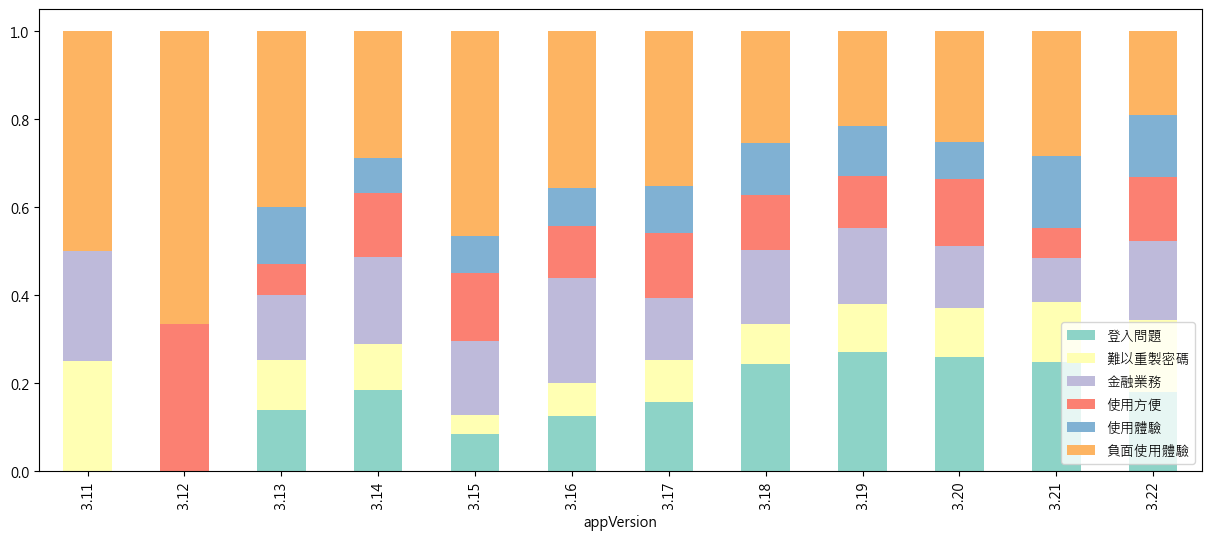

In [149]:
"""‰∏ªÈ°å‰∏Ä ÁÑ°Ê≥ïÁôªÂÖ• (Ë≤†Èù¢)
‰∏ªÈ°å‰∫å ÂøòË®òÂØÜÁ¢º Èõ£‰ª•ÊâæÂõû (Ë≤†Èù¢)
‰∏ªÈ°å‰∏â ËΩâÂ∏≥ÈáëËûç (‰∏≠ÊÄß)
‰∏ªÈ°åÂõõ ‰ΩøÁî®Êñπ‰æø (ÂîØ‰∏ÄÂ•ΩË©ï)
‰∏ªÈ°å‰∫î ‰ΩøÁî®È´îÈ©ó (‰∏≠ÊÄß)
‰∏ªÈ°åÂÖ≠ Ë≤†Èù¢‰ΩøÁî®È´îÈ©ó """

date_topic.columns = [
    "ÁôªÂÖ•ÂïèÈ°å",
    "Èõ£‰ª•ÈáçË£ΩÂØÜÁ¢º",
    "ÈáëËûçÊ•≠Âãô",
    "‰ΩøÁî®Êñπ‰æø",
    "‰ΩøÁî®È´îÈ©ó",
    "Ë≤†Èù¢‰ΩøÁî®È´îÈ©ó"
]


fig, ax = plt.subplots(figsize=(15, 6))
date_topic.plot.bar(ax=ax, stacked=True, color = plt.cm.Set3.colors)
ax.legend(loc='lower right')

## 8. ‰∏ªÈ°åÂàÜÂ∏ÉËàáÁâπÂæµË©ûÂàÜÊûê

Êú¨ÁØÄÈáùÂ∞çÂêà‰ΩúÈáëÂ∫´ App ‰ΩøÁî®ËÄÖË©ïË´ñÈÄ≤Ë°åÊõ¥Ê∑±ÂÖ•ÁöÑ‰∏ªÈ°åÁâπÂæµÂàÜÊûêÔºåÊé¢Ë®éÔºö

- ‰∏çÂêåË©ïÂàÜÁ≠âÁ¥ö‰∏ãÁöÑ‰∏ªÈ°åÂàÜÂ∏ÉÂ∑ÆÁï∞
- ÂêÑ‰∏ªÈ°å‰ª£Ë°®ÊÄßË©ûÂΩôËàáÈóúËÅØÊÄß
- ‰∏ªÈ°åË©ûÂΩôÁöÑÊ¨äÈáçÂàÜÂ∏ÉËàáË¶ñË¶∫Âåñ
- ‰∏ªÈ°å‰πãÈñìÁöÑÁõ∏‰ººÂ∫¶ËàáÂ∑ÆÁï∞

ÈÄèÈÅéÈÄô‰∫õÂàÜÊûêÔºåÊàëÂÄëÂèØ‰ª•Ôºö
- Ë≠òÂà•Áî®Êà∂ÊúÄÈóúÂøÉÁöÑÂäüËÉΩËàáÂïèÈ°å
- ÊâæÂá∫‰∏çÂêåË©ïÂàÜËÉåÂæåÁöÑ‰∏ªË¶ÅÂéüÂõ†
- ÂçîÂä©Áî¢ÂìÅÂúòÈöäÂÑ™ÂÖàÊîπÂñÑÈáçË¶ÅË≠∞È°å

In [1]:
from bertopic import BERTopic
from bertopic.vectorizers import ClassTfidfTransformer
from hdbscan import HDBSCAN
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
from transformers import BertTokenizerFast, AutoTokenizer, AutoModelForTokenClassification, AutoModelForSequenceClassification, pipeline
from sentence_transformers import SentenceTransformer
from ckip_transformers.nlp import CkipWordSegmenter, CkipPosTagger, CkipNerChunker
import pandas as pd
import re
import numpy as np
from collections import defaultdict
import multiprocessing
import jieba
import matplotlib.pyplot as plt
from matplotlib.font_manager import fontManager


In [2]:
# ËÆÄÂÖ•‰∏≠ÊñáÁ§∫ÁØÑË≥áÊñôÈõÜ
origin_data = pd.read_csv('merged_data.csv')

In [3]:
origin_data.head(3)

reviewId    userName  \
0  179e2c16-8898-4086-96ff-b897f0284ac4  Google ‰ΩøÁî®ËÄÖ   
1  781b02f8-bc78-4240-bb9e-45b2d9ccd61f  Google ‰ΩøÁî®ËÄÖ   
2  ed390033-a91c-4146-bde7-d4533145e9ba  Google ‰ΩøÁî®ËÄÖ   

                                           userImage  \
0  https://play-lh.googleusercontent.com/EGemoI2N...   
1  https://play-lh.googleusercontent.com/EGemoI2N...   
2  https://play-lh.googleusercontent.com/EGemoI2N...   

                                     content  score  thumbsUpCount  \
0                          Êõ¥Êñ∞ÂæåÂÆåÂÖ®ÁôªÂÖ•‰∏çÈÄ≤ÂéªÔºåË´ãÁ´ãÂç≥ÊîπÂñÑ„ÄÇ      1              0   
1                           Â∏åÊúõÂèØ‰ª•Êñ∞Â¢ûÂúñÂΩ¢ÊâãÂã¢ÊàñÊòØÊåáÁ¥ãÁôªÂÖ•      3              0   
2  Êåâ‰∫îÈ°ÜÊòüÁöÑËá™Â∑±Âì°Â∑•ÈÄÜÔºü ËºâÂÖ•ÈÉΩÁÑ°Ê≥ïÈÄ≤ÂÖ•ÁöÑapp ÊúâÊ≤íÊúâÊêûÈåØÂïä Èå¢‰∏çÊòØÈÄôÊ®£Ëä±ÁöÑÈòøÂ§ßÂì•      1              7   

  reviewCreatedVersion                   at  \
0            3.15.1219  2017-12-29 18:17:05   
1            3.15.1219  2017-12-22 16:00:34   
2            3.15.1219  2017-12-21 12:25:16   

                                        replyContent            repliedAt  \
0  ÊúâÈóúÊú¨Ë°åË°åÂãïÁ∂≤ÈäÄapp‰∫§Êòì‰øÇÂõ†Â∏≥Âãô‰∏ªÊ©ü‰∫§ÊòìÈáèÂ§ßËôïÁêÜÂõûÊáâÁ∑©ÊÖ¢ÔºåËá¥‰ΩøË°åÂãïÁ∂≤ÈäÄapp‰∫§ÊòìÈÅ≤Á∑©ÔºåÊú™ËÉΩ...  2018-01-11 11:02:41   
1                             ÊÇ®Â•ΩÔºåÊÑüË¨ùÊÇ®ÂØ∂Ë≤¥ÁöÑÂª∫Ë≠∞ÔºåÊú™‰æÜÊîπÁâàÊúÉÁ¥çÂÖ•ËÄÉÈáè„ÄÇ  2018-01-03 09:53:23   
2                         ÊÇ®Â•ΩÔºåÂ∑≤Êñº2017/12/20Êõ¥Êñ∞ÁâàÊú¨ÔºåË´ã‰∏ãËºâ‰ΩøÁî®„ÄÇ  2018-01-03 09:54:09   

  appVersion  
0  3.15.1219  
1  3.15.1219  
2  3.15.1219

In [4]:
# ÂéªÈô§‰∏Ä‰∫õ‰∏çÈúÄË¶ÅÁöÑÊ¨Ñ‰Ωç
metaData = origin_data[['content']]

# Âè™Áïô‰∏ã‰∏≠ÊñáÂ≠ó
metaData['content'] = metaData['content'].str.replace(r'\n\n','„ÄÇ', regex=True)
metaData['content'] = metaData['content'].str.replace(r'\n','', regex=True)


metaData = metaData.explode('content').reset_index(drop=True)

metaData['content'] = metaData['content'].apply(lambda x: re.sub('[^\u4e00-\u9fff]+', '',x))
metaData = metaData.dropna().reset_index(drop=True)
metaData.head()

content
0                     Êõ¥Êñ∞ÂæåÂÆåÂÖ®ÁôªÂÖ•‰∏çÈÄ≤ÂéªË´ãÁ´ãÂç≥ÊîπÂñÑ
1                    Â∏åÊúõÂèØ‰ª•Êñ∞Â¢ûÂúñÂΩ¢ÊâãÂã¢ÊàñÊòØÊåáÁ¥ãÁôªÂÖ•
2  Êåâ‰∫îÈ°ÜÊòüÁöÑËá™Â∑±Âì°Â∑•ÈÄÜËºâÂÖ•ÈÉΩÁÑ°Ê≥ïÈÄ≤ÂÖ•ÁöÑÊúâÊ≤íÊúâÊêûÈåØÂïäÈå¢‰∏çÊòØÈÄôÊ®£Ëä±ÁöÑÈòøÂ§ßÂì•
3                                Âπ≥ÂÆâÂæàÂ•Ω
4                           ÁÇ∫‰ªÄÈ∫ºÊ≤íÊúâÂè∞Âπ£ÂÆöÂ≠ò

In [5]:

# ‰∏≠ÊñáÊñáÁ´†
docs_zh = metaData['content'].tolist()[:500]

# Ë®≠ÂÆöÁπÅÈ´î‰∏≠ÊñáË©ûÂ∫´
jieba.set_dictionary("./dict/dict.txt.big")

# Êñ∞Â¢û stopwords
with open("./dict/stop_words.txt", encoding="utf-8") as f:
    stopWords = [line.strip() for line in f.readlines()]

# Ë®≠ÂÆö‰∏≠Êñá embedding model
bert_sentence_model = SentenceTransformer("BAAI/bge-m3")

# Â∞á‰∏≠ÊñáÊñáÁ´†ËΩâÊèõÁÇ∫ embedding
embeddings = bert_sentence_model.encode(docs_zh, show_progress_bar=True)

# ÂÆöÁæ©‰∏çÂêå clustering layer ÊâÄË¶Å‰ΩøÁî®ÁöÑÊ®°ÂûãËàáÊñπÊ≥ïÔºàÂ∞±Áî® default ÁöÑ HDBSCANÔºâ
hdbscan_model = HDBSCAN()

# ÂÆöÁæ©‰∏ÄÂÄãÈÅ©Âêà‰∏≠ÊñáÁöÑÂàÜË©ûÂáΩÊï∏
def tokenize_zh(text):
    words = jieba.lcut(text)
    return words

# Âª∫Á´ã‰∏ÄÂÄã‰ΩøÁî® jieba ÂàÜË©ûÁöÑ CountVectorizer
jieba_vectorizer = CountVectorizer(tokenizer=tokenize_zh, stop_words=stopWords, analyzer='word', token_pattern=u"(?u)\\b\\w+\\b")

# ‰ΩøÁî® BERTopic ÈÄ≤Ë°å‰∏ªÈ°åÊ®°ÂûãÂª∫Á´ã
zh_topic_model = BERTopic(embedding_model=bert_sentence_model, vectorizer_model=jieba_vectorizer, verbose=True, top_n_words=30)
topics, probs = zh_topic_model.fit_transform(docs_zh, embeddings)

zh_topic_model.get_topic_info()

Batches:   0%|          | 0/16 [00:00<?, ?it/s]

2025-05-18 19:37:51,247 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-05-18 19:38:01,509 - BERTopic - Dimensionality - Completed ‚úì
2025-05-18 19:38:01,510 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-05-18 19:38:01,541 - BERTopic - Cluster - Completed ‚úì
2025-05-18 19:38:01,546 - BERTopic - Representation - Fine-tuning topics using representation models.
Building prefix dict from c:\Users\hank\Desktop\sb\dict\dict.txt.big ...
Loading model from cache C:\Users\hank\AppData\Local\Temp\jieba.u465ee282b7ba9db18471e8710c3c9621.cache
Loading model cost 0.974 seconds.
Prefix dict has been built successfully.
2025-05-18 19:38:02,591 - BERTopic - Representation - Completed ‚úì


Topic  Count              Name  \
0      -1    110     -1_ _‰∏ÄÁõ¥_ÁôªÂÖ•_ÈåØË™§   
1       0     73      0_ÁôªÂÖ•_ÁÑ°Ê≥ï_ _‰∏ÄÁõ¥   
2       1     50    1_ÈäÄË°å_‰ø°Áî®Âç°_Á∂≤ÈäÄ_ÁôªÂÖ•   
3       2     43      2_Êõ¥Êñ∞_‰ΩøÁî®_ÁÑ°Ê≥ï_Âçª   
4       3     36      3_Âæå_Êõ¥Êñ∞_ÁÑ°Ê≥ï_ÁôªÂÖ•   
5       4     34     4_ËΩâÂ∏≥_Á∞°Ë®ä_Â∏≥Ëôü_ÂåØÊ¨æ   
6       5     32       5_Êñπ‰æø_ _Â•Ω_‰æøÂà©   
7       6     26     6_ÊâãÊ©ü_ÊîØÊè¥_ÁâàÊú¨_‰∏âÊòü   
8       7     23       7_ÂæàÁàõ_ _Â•áËë©_Áàõ   
9       8     22      8_Êâì‰∏çÈñã_ÈñãÂïü_ _Èñã   
10      9     14     9_ÊåáÁ¥ã_Ëæ®Ë≠ò_Êñ∞Â¢û_ÁôªÂÖ•   
11     10     14  10_ÈÄ£‰∏ç‰∏ä_‰º∫ÊúçÂô®_ÈÄ£Êé•_ÈÄ£Á∑ö   
12     11     12   11_‰ΩøÁî®_ÁÑ°Ê≥ï_ÂÆ¥Áî®_ËΩâÂè∞Âπ£   
13     12     11    12_Ë≥áÊñô_ÈåØË™§_Ê≠£Á¢∫_ÂØÜÁ¢º   

                                       Representation  \
0   [ , ‰∏ÄÁõ¥, ÁôªÂÖ•, ÈåØË™§, ‰º∫ÊúçÂô®, ÂïèÈ°å, È°ØÁ§∫, ËôïÁêÜ, Áï∞Â∏∏, Â§±Êïó, ÊÜëË≠â, Ë≥á...   
1   [ÁôªÂÖ•, ÁÑ°Ê≥ï,  , ‰∏ÄÁõ¥, ÁôªÈåÑ, ‰ªäÂ§©, Ë´ã, Ëæ¶Ê≥ï, ÈÄ≤ÂÖ•, Áôª, ÂπæÂ§©, Ê≠£Â∏∏, ...   
2   [ÈäÄË°å, ‰ø°Áî®Âç°, Á∂≤ÈäÄ, ÁôªÂÖ•, Êü•Ë©¢, ÊàêÂäü,  , ‰ΩøÁî®, ÂêàÂ∫´, Áôª, Â§±Êïó, Áî≥Ë´ã...   
3   [Êõ¥Êñ∞, ‰ΩøÁî®, ÁÑ°Ê≥ï, Âçª, Âæå,  , ÈñãÂïü, ‰∏ÄÁõ¥, ÂÆâË£ù, ‰∫∫, Á®ãÂºè, Á≥ªÁµ±, Âïè...   
4   [Âæå, Êõ¥Êñ∞, ÁÑ°Ê≥ï, ÁôªÂÖ•, ÈÄ≤‰∏çÂéª,  , ÂÆåÂÖ®, ‰πãÂæå, ‰∏ÄÁõ¥, ÂàùÂßã, ÂÅú, ÂàùÂßãÂåñ...   
5   [ËΩâÂ∏≥, Á∞°Ë®ä, Â∏≥Ëôü, ÂåØÊ¨æ,  , ÂØÜÁ¢º, ÁÑ°Ê≥ï, Ë™çË≠âÁ¢º, Ê©üÂà∂, Êî∂‰∏çÂà∞, Ë™çË≠â, ...   
6   [Êñπ‰æø,  , Â•Ω, ‰æøÂà©, ÊúçÂãô, Âπ≥ÂÆâ, Âä†Ê≤π, ËÆö, Â•ΩÁî®, Ë°åÂãï, Ë¨ùË¨ù, ÂÆûÁî®, ...   
7   [ÊâãÊ©ü, ÊîØÊè¥, ÁâàÊú¨, ‰∏âÊòü, Âæå, Ëß£Ê±∫, ÈáçÊñ∞ÂÆâË£ù, Âá∫Áèæ,  , ‰∏ãËºâ, Êõ¥Êñ∞, ‰∫ã...   
8   [ÂæàÁàõ,  , Â•áËë©, Áàõ, Êù±Ë•ø, Ë∂ÖÁàõ, ÁàõÂà∞, Êêû, Â∏≥ËôüÂØÜÁ¢º, ‰∏ÄÈªû, ÈåØË™§, Áâà,...   
9   [Êâì‰∏çÈñã, ÈñãÂïü,  , Èñã, Ê≠ªÁï∂, Á®ãÂºè, ÈÄ£Èñã, ÂÆåÂÖ®, ÊîπÂñÑ, ÂÆ¢Êúç, Âç°‰Ωè, ÈñãÊòØ...   
10  [ÊåáÁ¥ã, Ëæ®Ë≠ò, Êñ∞Â¢û, ÁôªÂÖ•, Êñπ‰æø, Ë®≠ÂÆö, Âø´ÈÄü, Ëº∏ÂÖ•, Á≥ªÁµ±, ÊØèÊ¨°,  , Áï∞Â∏∏...   
11  [ÈÄ£‰∏ç‰∏ä, ‰º∫ÊúçÂô®, ÈÄ£Êé•, ÈÄ£Á∑ö, Ê™¢Êü•, ‰∏ÄÁõ¥, ÁÑ°Ê≥ï,  , ÂØ¶Èöõ, ËÖ¶Â≠ê, ÂÆ∂‰∏≠, ...   
12  [‰ΩøÁî®, ÁÑ°Ê≥ï, ÂÆ¥Áî®, ËΩâÂè∞Âπ£, Â§±Êúõ, ÊÑüÂà∞,  , ÊÉÖÊ≥Å, ËèØÁÇ∫, Ê¨äÈôê, ËÆÄÂèñ, Â§ñ...   
13  [Ë≥áÊñô, ÈåØË™§, Ê≠£Á¢∫, ÂØÜÁ¢º, ‰∏ÄÁõ¥, Âá∫Áèæ, ÁôªÂÖ•, Ëº∏ÂÖ•, Â∏≥ËôüÂØÜÁ¢º, Áâà, Áõ¥Ë™™, ...   

                                  Representative_Docs  
0   [Á≥ªÁµ±Áï∞Â∏∏Ë´ãÊ¥ΩÈäÄË°åÂÆ¢Êúç‰∫∫Âì°‰ΩÜ‰∏ÄÁõ¥Ê≤í‰∫∫ËôïÁêÜÈòø, ÊÄéÈ∫º‰∏ÄÁõ¥È°ØÁ§∫‰º∫ÊúçÂô®ÈåØË™§, Êõ¥Êñ∞ÂæåÂ∞±ÁÑ°Ê≥ïÁôªÂÖ•‰∏ÄÁõ¥...  
1                                  [ÁÑ°Ê≥ïÁôªÂÖ•, ÁÑ°Ê≥ïÁôªÂÖ•, ÁÑ°Ê≥ïÁôªÂÖ•]  
2   [ÁÇ∫‰ΩïË¶ÅÊü•Ë©¢‰ø°Áî®Âç°Â∏≥ÂñÆÂçªË¶ÅÊàëÁôªÂÖ•ÂÄã‰∫∫Á∂≤ÈäÄÊòéÊòéÂú®‰Ω†ÂÄëÁ∂≤È†ÅÁâàÂè™Ë¶ÅÁôªÂÖ•‰ø°Áî®Âç°ÊúÉÂì°Â∞±ËÉΩÊü•Ë©¢Âú®Âçª‰∏çÂêåË™ø...  
3                                  [‰∏çËÉΩÊõ¥Êñ∞, ÁÑ°Ê≥ïÊõ¥Êñ∞, ÁÑ°Ê≥ïÊõ¥Êñ∞]  
4                         [Êõ¥Êñ∞ÂæåÁÑ°Ê≥ïÁôªÂÖ•, Êõ¥Êñ∞ÂæåÁÑ°Ê≥ïÁôªÂÖ•, Êõ¥Êñ∞ÂæåÁÑ°Ê≥ïÁôªÂÖ•]  
5                          [ËΩâÂ∏≥Êî∂‰∏çÂà∞Á∞°Ë®äÂØÜÁ¢º, Êõ¥Êñ∞Âæå‰∏çËÉΩËΩâÂ∏≥, ÁÑ°Ê≥ïËΩâÂ∏≥]  
6                                   [ÂæàÊñπ‰æø, Êñπ‰æø, ÂæàÊñπ‰æøÂæàÂ•ΩÁî®]  
7   [Êõ¥Êñ∞ÂæåÁÑ°Ê≥ïÈñãÂïüÂá∫Áèæ‰∏çÊîØÊè¥Ê≠§ÊâãÊ©üÊàëÊòéÊòéÊòØÂéüÂª†Á≥ªÁµ±Ê≤íÊõ¥ÊîπÈÅéÈ∫ªÁÖ©ÊîπÊîπÂ•ΩÂóéÊõ¥Êñ∞Âæå‰ªçÁÑ∂Âá∫Áèæ‰∏çÊîØÊè¥Ê≠§Êâã...  
8   [ÁàõÊ≠ª‰∫Ü‰ªäÂ§©Êó©‰∏ä‰∏ÉÂÖ´Èªû‰πüÁôªÂÖ•‰∏çÈÄ≤ÂéªÁàõÂÆ¢Êúç‰πü‰∏çÁü•Ë∑ëÂì™ÂéªÈ¶¨ÁöÑÈÄôÈ∫ºÂ§ö‰∫∫ÂèçÊáâÁàõ‰∫Ü‰πü‰∏çÊáÇÂæóÊîπÈÄ≤, ÁúüÁöÑ...  
9                                    [Êâì‰∏çÈñã, Êâì‰∏çÈñãÂïä, Êâì‰∏çÈñã]  
10                 [Êñ∞Â¢ûÁöÑÊåáÁ¥ãËæ®Ë≠òÂäüËÉΩÂ∞ç‰ΩøÁî®ËÄÖÊñπ‰æøÂ§ö‰∫Ü, Êñ∞Â¢ûÊåáÁ¥ãÁôªÂÖ•ÂæàÊñπ‰æø, ÊåáÁ¥ã]  
11  [ÈÄ£‰∏ç‰∏ä, ‰∏ÄÁõ¥È°ØÁ§∫ÁÑ°Ê≥ïÈÄ£‰∏ä‰º∫ÊúçÂô®Ë´ãÊ™¢Êü•Á∂≤ÈöõÁ∂≤Ë∑ØÊòØÂê¶Ê≠£Â∏∏, ÁÑ°Ê≥ïÈÄ£Êé•‰º∫ÊúçÂô®ÊïÖÁÑ°Ê≥ï‰ΩøÁî®‰ΩÜÂØ¶ÈöõÊúâ...  
12                                 [ÁÑ°Ê≥ï‰ΩøÁî®, ÁÑ°Ê≥ï‰ΩøÁî®, ÁÑ°Ê≥ï‰ΩøÁî®]  
13  [Ëº∏ÂÖ•Ê≠£Á¢∫ÁöÑÂ∏≥ËôüÂØÜÁ¢ºÈ°ØÁ§∫Ë≥áÊñô‰∏çÊ≠£Á¢∫ÂèàÁôºÁîü‰∫Ü‰ΩÜÊòØÈõªËÖ¶ÁâàÁ´üÁÑ∂‰πüÊúâÈÄôÂÄãÂïèÈ°å, ‰∏ÄÁõ¥Âá∫ÁèæË≥áÊñô‰∏çÊ≠£Á¢∫,...

In [6]:
zh_topic_model.visualize_topics()

In [7]:
# ‰º∞ÁÆóÊØèÂÄãÊñá‰ª∂Â∞çBERTopicÊØèÂÄã‰∏ªÈ°åÁöÑÊ©üÁéáÂàÜÂ∏É
topic_distr, _ = zh_topic_model.approximate_distribution(docs_zh)

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1/1 [00:00<00:00,  4.24it/s]


In [9]:
# ‰ª•Á¨¨18ÂÄãÊñá‰ª∂ÁÇ∫‰æãÔºåÂàóÂá∫ÈÄô‰ªΩÊñá‰ª∂Â∞çÊØèÂÄã‰∏ªÈ°åÁöÑÊ©üÁéáÂàÜÂ∏É
zh_topic_model.visualize_distribution(topic_distr[13])

In [10]:
# ÂàóÂá∫‰∏ªÈ°åÁöÑ‰ª£Ë°®Ë©ûÂíåÂÖ∂Â∞çÊáâÁöÑÊ¨äÈáç
zh_topic_model.get_topic(2)

[('Êõ¥Êñ∞', 0.17601102111153255),
 ('‰ΩøÁî®', 0.07746503103225992),
 ('ÁÑ°Ê≥ï', 0.06755337292227993),
 ('Âçª', 0.06375427002077816),
 ('Âæå', 0.05668109945704502),
 (' ', 0.05219428650268092),
 ('ÈñãÂïü', 0.04481942032820539),
 ('‰∏ÄÁõ¥', 0.03742030152843072),
 ('ÂÆâË£ù', 0.03722836123450204),
 ('‰∫∫', 0.03722836123450204),
 ('Á®ãÂºè', 0.03324976552917237),
 ('Á≥ªÁµ±', 0.031047937979315036),
 ('ÂïèÈ°å', 0.030165804815225506),
 ('Âº∑Âà∂', 0.028911360681799895),
 ('‰∏ãËºâ', 0.02832689959321674),
 ('Ê´ÉÊ™Ø', 0.02553632970592024),
 ('ÈÄôÈ∫º‰πÖ', 0.02553632970592024),
 ('ÂïÜÂ∫ó', 0.02349964872663861),
 ('ÁúüÊòØ', 0.02349964872663861),
 ('Êâæ', 0.02349964872663861),
 ('Â∑≤Á∂ì', 0.023313433838889466),
 ('Ë™™', 0.023313433838889466),
 ('Â•ΩÂ•Ω', 0.022059285198428313),
 ('Ë∂ä', 0.022059285198428313),
 ('ÊúÄÊñ∞Áâà', 0.022059285198428313),
 ('Ë¶ÅÊ±Ç', 0.020945646977752166),
 ('‰øÆÊ≠£', 0.020945646977752166),
 ('Êêû', 0.020038650717368094),
 ('Ëß£Èô§', 0.020038650717368094),
 ('ÈñÉÈÄÄ', 0.01861418

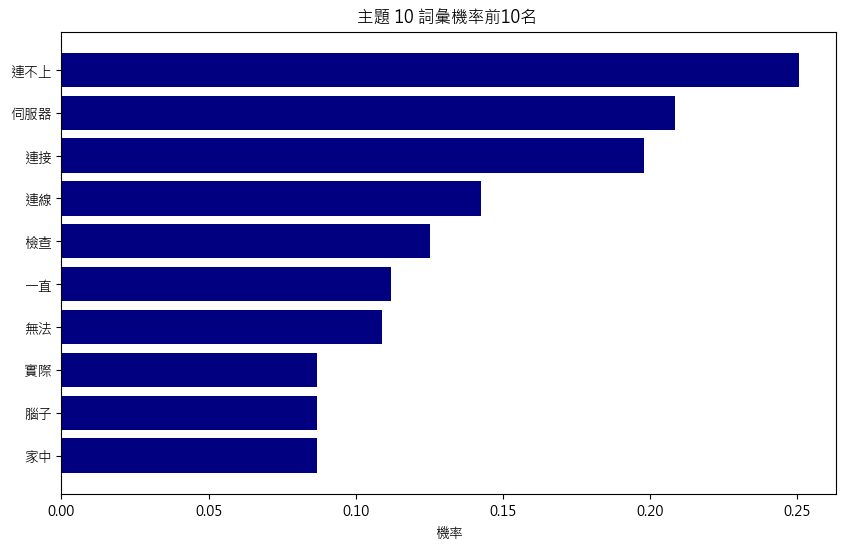

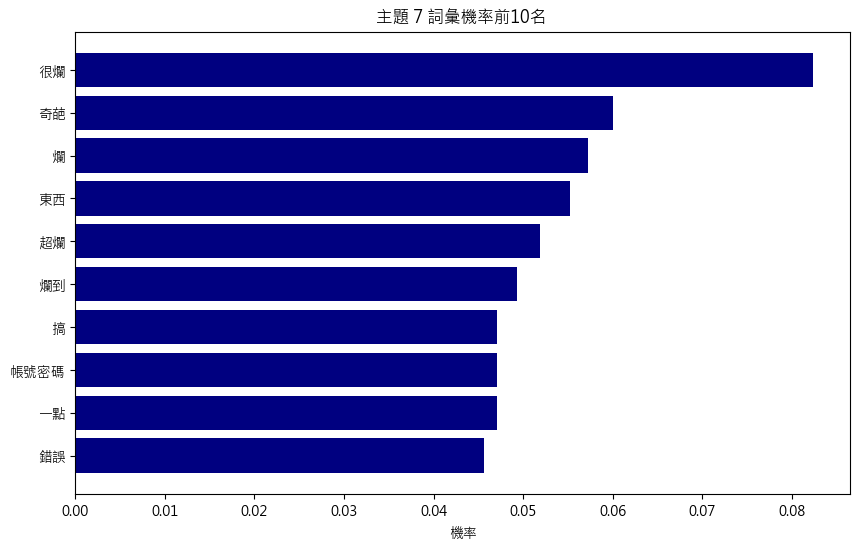

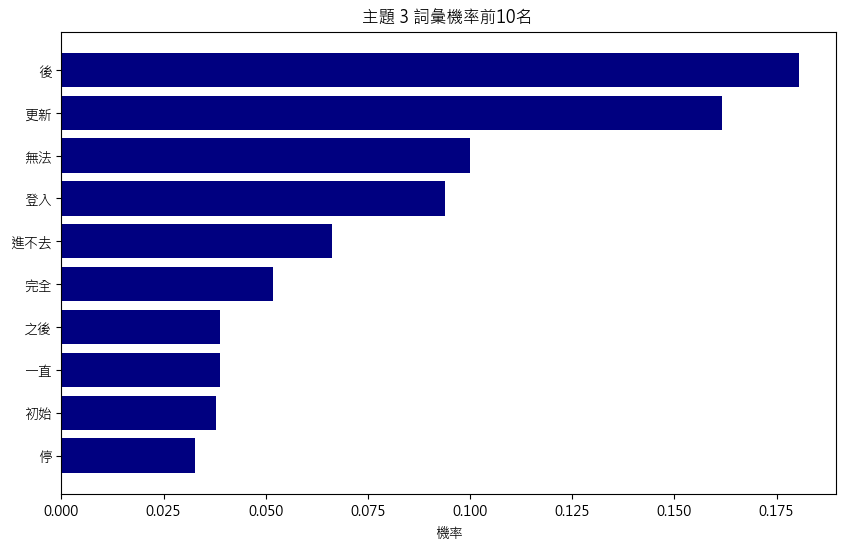

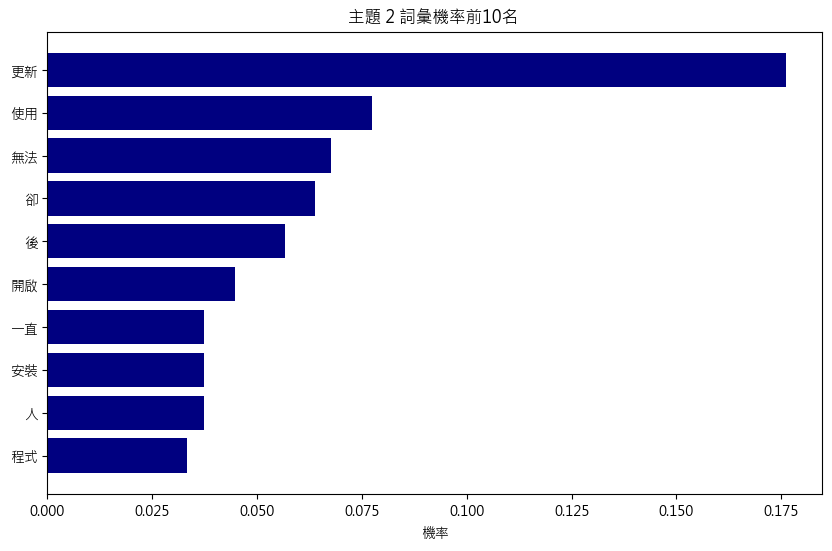

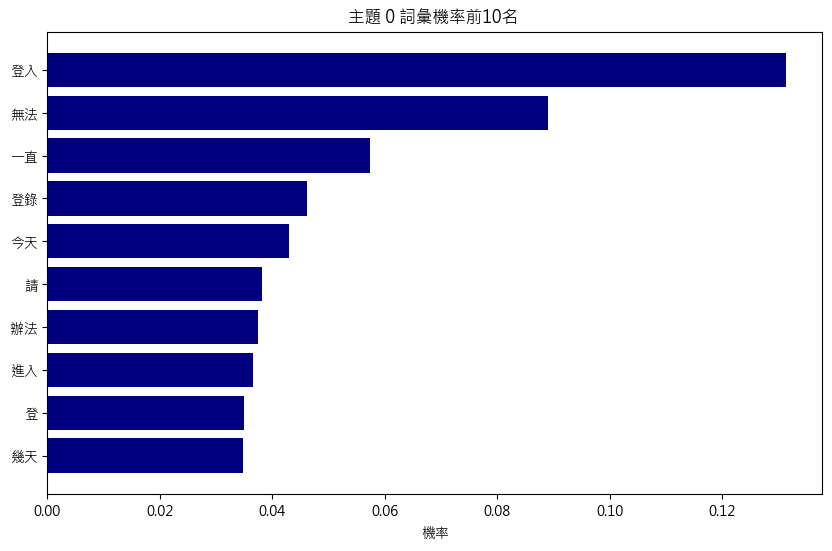

In [30]:
top_distribution = [10,7,3,2,0]
for i in top_distribution:
    # ÂèñÂæóÊØèÂÄã‰∏ªÈ°åÁöÑÈóúÈçµË©û
    topic_words = zh_topic_model.get_topic(i)
    
    # ËΩâÊèõÁÇ∫DataFrame
    df = pd.DataFrame(topic_words, columns=['word', 'prob'])
    df = df[df['word'] != ' ']
    
    # Ê†πÊìöprobÊéíÂ∫è‰∏¶ÈÅ∏Âá∫Ââç10Âêç
    top_10 = df.sort_values('prob', ascending=False).head(10)
    
    # Áï´Âá∫Èï∑Ê¢ùÂúñ
    plt.figure(figsize=(10,6))
    plt.barh(top_10['word'], top_10['prob'], color='navy')
    plt.xlabel('Ê©üÁéá')
    plt.title(f'‰∏ªÈ°å {i} Ë©ûÂΩôÊ©üÁéáÂâç10Âêç ')
    plt.gca().invert_yaxis()
    plt.show()

## 9. Á§æÁæ§Á∂≤Ë∑ØÂàÜÊûê

ÈáùÂ∞çÂêà‰ΩúÈáëÂ∫´ App 3.20-3.22 ÁâàÊú¨ÁöÑ‰ΩøÁî®ËÄÖË©ïË´ñÈÄ≤Ë°åÁ§æÁæ§Á∂≤Ë∑ØÂàÜÊûêÔºåÊé¢Ë®éÔºö

- ‰ΩøÁî®ËÄÖËàá‰∏çÂêåÁâàÊú¨‰πãÈñìÁöÑ‰∫íÂãïÈóú‰øÇ
- Ë©ïÂàÜÂÇæÂêëÔºàÊ≠£Èù¢/Ë≤†Èù¢ÔºâÁöÑÂàÜÂ∏ÉÊÉÖÂΩ¢
- Ë©ïË´ñÈÄ£ÁµêÁöÑÂº∑Â∫¶ËàáÁâπÊÄß

ÈÄèÈÅéÁ§æÁæ§Á∂≤Ë∑ØË¶ñË¶∫ÂåñÔºåÊàëÂÄëÂèØ‰ª•Ôºö

- Ë≠òÂà•Áî®Êà∂Â∞çÂêÑÁâàÊú¨ÁöÑË©ïÂÉπÂÇæÂêë
- ËßÄÂØüÁî®Êà∂ÂèçÈ•ãÁöÑÁâàÊú¨ÈõÜ‰∏≠Â∫¶
- ÁôºÁèæÊΩõÂú®ÁöÑÂïèÈ°åÊ®°ÂºèËàáÊîπÂñÑÊ©üÊúÉ

ÈÄô‰∫õÊ¥ûÂØüÊúâÂä©ÊñºÁî¢ÂìÅÂúòÈöäÔºö

- ËøΩËπ§ÁâàÊú¨Ëø≠‰ª£ÁöÑÁî®Êà∂ÂèçÊáâ
- Ë©ï‰º∞ÁâàÊú¨Êõ¥Êñ∞ÁöÑÂΩ±Èüø
- Âà∂ÂÆöÈáùÂ∞çÊÄßÁöÑÊîπÂñÑÁ≠ñÁï•

In [2]:
import pandas as pd
import numpy as np
import pyvis
import networkx as nx
import matplotlib.pyplot as plt
from IPython.display import Image

In [37]:

select_versions = udn[udn['appVersion'].isin(['3.22', '3.21', '3.20'])]
select_versions


reviewId  score  \
2306  e9f9244d-3a9c-4882-9687-d08d802619c1      1   
2307  5a3f7d7c-ea2b-4fbd-8fe9-8b2b1c208d91      1   
2308  73f07fd6-1417-43ce-9a74-40093563c864      1   
2309  e66dfdd0-77ec-478c-a904-c6d28300e9f9      1   
2310  c3541a19-0abd-443b-b2f2-707c8e7b4365      1   
...                                    ...    ...   
3001  256c78ca-38a0-4954-a18b-2824d8c946de      2   
3002  ef7f2908-14de-4ef1-9e81-c41dc7c99f4e      3   
3003  b29d2236-757a-4945-8881-67066dfa3bff      1   
3004  79733990-ecc2-44ff-8c08-01cde53e6fae      3   
3005  e02b0db9-ea26-4f79-9ae8-c9f46f71d25e      1   

                                                content             artDate  \
2306                                        ÂæàÈõ£Êìç‰ΩúÊôÉÂçäÂ§©ÈÄ≤‰∏çÂéªÂë¢ 2022-12-26 16:09:22   
2307  ÈñãÂïüÂÖ•Â∏≥ÈÄöÁü•ÔºåÁµêÊûúÈáëÈå¢ÂÖ•Â∏≥ÈÉΩ‰∏çÊúÉÈÄöÁü•ÔºàÂ∞çÊñπÈÇÑË¶ÅÂÇôË®ªËñ™Ë≥áÔºâÔºåÈõ£ÈÅìË¢´ÁõúÁî®‰∫∫È†≠ÂºµÊà∂ÔºåÈäÄË°åË≤†Ë≤¨ÂóéÔºüÈÉΩ... 2022-12-16 21:37:41   
2308     ÁÇ∫Âï•ÊàëÂúñÂΩ¢ÁôªÂÖ•ÔºåÊØèÊ¨°ÈÉΩË¶ÅÁôªÂÖ•ÂÖ©Ê¨°ÔºüÁ¨¨‰∏ÄÊ¨°ÂÆåÂÖ®Ê≤íÂèçÊáâÔºåÈÉΩË¶ÅÊàëÂÖàÊåâÂèñÊ∂àÂÜçÁôªÂÖ•‰∏ÄÊ¨°ÔºåÂ§™‰∏çÊñπ‰æø‰∫ÜÂêßÔºÅ 2022-12-16 00:52:07   
2309                   Á®ãÂºè‰∏ÄÁõ¥ÁπûÂúàÂúàÔºåË∑ë‰∏çÂãï„ÄÇÈ°ØÁ§∫ÁÑ°Ê≥ïËàá‰º∫ÊúçÂô®ÈÄ£Á∑ö ‰∏ÄÁõ¥ÂÅúÂú®Êõ¥Êñ∞‰∏≠5% 2022-12-07 07:38:34   
2310                                          Áàõ+Áàõ+Áàõ+Áàõ+Áàõ 2022-12-06 22:54:07   
...                                                 ...                 ...   
3001          ÂéüÂèØËΩâÂ∏≥ÔºåÊõ¥Êñ∞appÂæåÔºåOTPË¶ÅË∑≥Âá∫ÂâçÈÉΩÊúÉÂá∫ÁèæË®äÊÅØ‚ÄùÂ§™‰πÖÊú™ÊìçÂÅö", Â§öÊ¨°Ë©¶Áî®ÈÉΩ‰∏ÄÊ®£ 2024-01-03 19:30:13   
3002                           Âπæ‰πéÊØèÊ¨°ÁôªÂÖ•ÈÉΩË¶Å‰æÜ‰∏ÄÊ¨°ÂêåÊ≠•Ë≥áÊñôÁúüÁöÑÈùûÂ∏∏Êµ™Ë≤ªÊôÇÈñì„ÄÇ 2024-01-03 14:31:06   
3003                            ‰∏ÄÂ§©Âà∞ÊôöÂú®Êõ¥Êñ∞ÔºåÊâÄÊúâÈäÄË°åÁöÑappÂ∞±Â±¨‰Ω†ÂÄëÊúÄÁàõ‚Ä¶ 2024-01-03 08:13:00   
3004                            ÊúâÂ§†Èõ£Áî®ÔºåÂà∞Â∫ïÊúâÊ≤íÊúâÂú®Ë™çÁúüÁ∂ìÁáüÔºåÂ≠∏Â≠∏Âà•ÂÆ∂ÈäÄË°åÂï¶ 2024-01-02 18:45:40   
3005  AppÊéÉÊèèQR CodeËÉΩÂø´Èªû‰øÆÂæ©ÂóéÔºÅÂà•ÂÆ∂ÈäÄË°åÁ∂≤ÈäÄÊéÉ‰∏ÄÊ¨°Â∞±ÊàêÂäüÔºåÂêàÂ∫´ÁöÑÂ∏∏Â∏∏ÈÉΩÊ≤íÊéÉÊàêÂäüÔºåÂ∞çÊ∫ñ‰∫Ü... 2024-01-01 22:47:59   

     appVersion    userName                                              words  
2306       3.20         ÊùéÂ¶πËò≠                                  [ÂæàÈõ£, Êìç‰Ωú, ÂçäÂ§©, ÈÄ≤‰∏çÂéª]  
2307       3.20         ÊûóÂ•ïÁùø  [ÈñãÂïü, ÂÖ•Â∏≥, ÈÄöÁü•, ÈáëÈå¢, ÂÖ•Â∏≥, ÈÄöÁü•, Â∞çÊñπ, ÈÇÑË¶Å, ÂÇôË®ª, Ëñ™Ë≥á, Ë¢´Áõú, Áî®...  
2308       3.20          ÈòøÊ®Ç  [ÂúñÂΩ¢, ÁôªÂÖ•, ÊØèÊ¨°, ÁôªÂÖ•, ÂÖ©Ê¨°, Á¨¨‰∏ÄÊ¨°, ÂÆåÂÖ®, ÂèçÊáâ, ÂèñÊ∂à, ÁôªÂÖ•, ‰∏ÄÊ¨°, Êñπ‰æø]  
2309       3.20         Êô¥Â§©È≠ö    [Á®ãÂºè, ‰∏ÄÁõ¥, ÁπûÂúàÂúà, Ë∑ë‰∏çÂãï, È°ØÁ§∫, ÁÑ°Ê≥ï, ‰º∫ÊúçÂô®, ÈÄ£Á∑ö, ‰∏ÄÁõ¥, Êõ¥Êñ∞, 5%]  
2310       3.20          Â•ïÂæ∑                                                 []  
...         ...         ...                                                ...  
3001       3.21   Chris Lee     [ÂéüÂèØ, ËΩâÂ∏≥, Êõ¥Êñ∞, app, OTP, Ë∑≥Âá∫, Âá∫Áèæ, Ë®äÊÅØ, Â§™‰πÖ, Êú™Êìç, Ë©¶Áî®]  
3002       3.21   Peggy Lee                 [ÊØèÊ¨°, ÁôªÂÖ•, Ë¶Å‰æÜ, ‰∏ÄÊ¨°, ÂêåÊ≠•, Ë≥áÊñô, ÁúüÁöÑ, Êµ™Ë≤ªÊôÇÈñì]  
3003       3.21  5 A (A5ÂíåÁâõ)                    [‰∏ÄÂ§©Âà∞Êôö, Êõ¥Êñ∞, ÊâÄÊúâ, ÈäÄË°å, app, Â∞±Â±¨, ÊúÄÁàõ]  
3004       3.21        CY Y                  [ÊúâÂ§†, Èõ£Áî®, ÊúâÊ≤íÊúâ, Ë™çÁúü, Á∂ìÁáü, Â≠∏Â≠∏, Âà•ÂÆ∂, ÈäÄË°å]  
3005       3.21          ËâæÂÄ´  [App, ÊéÉÊèè, QR, Code, Âø´Èªû, ‰øÆÂæ©, Âà•ÂÆ∂, ÈäÄË°å, Á∂≤ÈäÄÊéÉ, ‰∏ÄÊ¨°, Êàê...  

[595 rows x 7 columns]

In [ ]:
#parse comment
import random



re_df = select_versions[['userName','appVersion','score']].rename(columns = {'userName':'src','appVersion':'dis','score':'weight'})
re_df = re_df[~re_df['src'].isna()]
re_df = re_df[~re_df['dis'].isna()]
re_df = re_df[~re_df['weight'].isna()]




def convertStatus(s):
  if s >3:
    return 2
  else :
    return -1
re_df['weight'] = re_df['weight'].map(convertStatus)
re_df = re_df.groupby(['src','dis']).sum().reset_index()

# Ë®≠ÂÆöÂàÜÊï∏‰ΩéÁöÑÁÇ∫Á¥ÖËâ≤
def getColor(w):
  if w>0:
    return 'green'
  else:
    return 'red'
re_df['color'] = re_df.weight.map(getColor)


In [ ]:
import pyvis
from PIL import Image

netWork = pyvis.network.Network(notebook=True, cdn_resources='in_line',directed=True)


person = list(set(+re_df.src.unique().tolist()))
# ÁßªÈô§ url ‰∏≠ÁöÑ nan ÂÄºÔºåÂª∫Á´ã url_clean

netWork.add_nodes(
    nodes = person,
    value = [1 for i in range(len(person))],
    color = ['#66CDAA' for i in range(len(person))],
    title = person
)

for i in re_df.to_numpy():
  netWork.add_edge(i[0],i[1],width = 2,color=i[3])

# Ë®≠ÂÆölayout
netWork.repulsion()

# Áî¢Áîü HTML Â≠ó‰∏≤
html_content = netWork.generate_html()

# ÊâãÂãï‰ª• utf-8 ÂÑ≤Â≠òÊ™îÊ°àÔºåÈÅøÂÖç cp950 Á∑®Á¢ºÈåØË™§
with open('network.html', 'w', encoding='utf-8') as f:
    f.write(html_content)


ÂèØ‰ª•ÁúãÂà∞Âú®Á§æÁæ§Á∂≤Ë∑ØÂúñÁâá‰∏≠ Âú®‰∏âÂÄãÁâàÊú¨ 3.22 3.21 3.20 ‰∏≠ÁöÑ‰ΩøÁî®ËÄÖËàáÁâàÊú¨‰πãÈñìÁöÑÈóúËÅØÊÄß
Â§ßÂ§öÊï∏ÁÇ∫Á¥ÖËâ≤Ë≤†Èù¢ÈÄ£Áµê
‰∏îÂ§ßÂ§öÊï∏‰ΩøÁî®ËÄÖÂè™ÊúÉË©ïË´ñ‰∏ÄÂÄãÁâàÊú¨



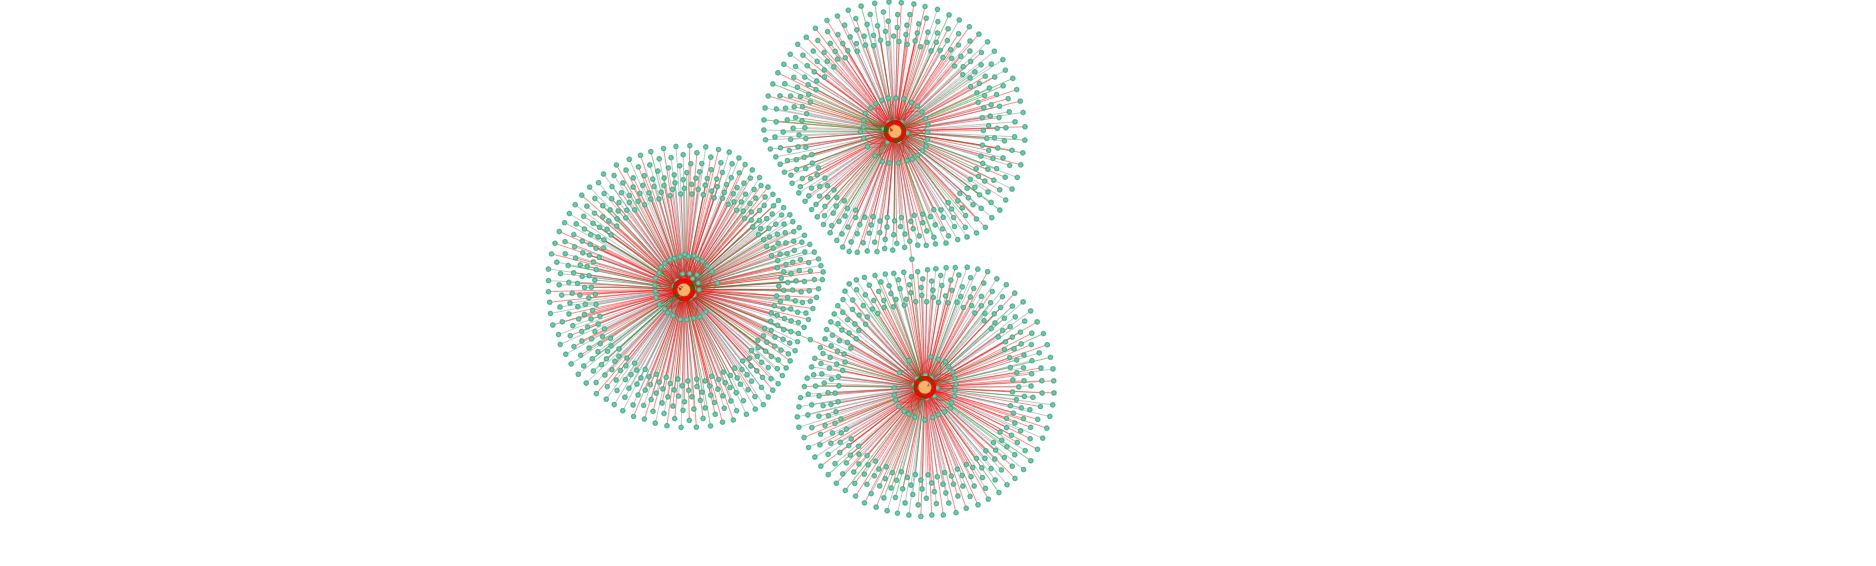

In [40]:
Image.open('network.png')